In [3]:
### Reading in the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the file path
file_path = r'C:\Users\phili\Documents\Master Data Science\Master Thesis\Phishing dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              3           0            2   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  qty_nameservers  \
0                    0              0  ...                1                2   
1                    0      

### Exploratory Data Analysis

#### Data types

In [4]:
print(df.dtypes)

data_types = df.dtypes

data_type_counts = data_types.value_counts()

print(data_type_counts)

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object
int64      111
float64      1
Name: count, dtype: int64


#### Summary Statistics

In [5]:
summary_stats = df.describe()

print(summary_stats)

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

#### Missing Values

In [6]:
missing_values_exist = df.isnull().any().any()

# Print the result
if missing_values_exist:
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


##### Checking Which features are redundant based on high portion of values that indicate that the specific characteristic is not present in the link

In [7]:
# Assuming df is your DataFrame
# Check the percentage of -1 values for each column
percentage_minus_one = (df == -1).mean(axis=0)

# Select features where the percentage of -1 values is over 90%
redundant_features = percentage_minus_one[percentage_minus_one > 0.9]

# Print or inspect the redundant features
print("Features with over 90% of values as -1:")
print(redundant_features)



Features with over 90% of values as -1:
qty_dot_params             0.916275
qty_hyphen_params          0.916275
qty_underline_params       0.916275
qty_slash_params           0.916275
qty_questionmark_params    0.916275
qty_equal_params           0.916275
qty_at_params              0.916275
qty_and_params             0.916275
qty_exclamation_params     0.916275
qty_space_params           0.916275
qty_tilde_params           0.916275
qty_comma_params           0.916275
qty_plus_params            0.916275
qty_asterisk_params        0.916275
qty_hashtag_params         0.916275
qty_dollar_params          0.916275
qty_percent_params         0.916275
params_length              0.916275
tld_present_params         0.916275
qty_params                 0.916275
dtype: float64


###### As the Above code shows, many features describing the parameter values of the link consists of -1 values. -1 stands for not present in the link. therefor those features that consists of at least 90% -1 values are deleted from the dataset.

In [8]:
import pandas as pd

# Assuming df is your DataFrame
# Check the percentage of -1 values for each column
percentage_minus_one = (df == -1).mean(axis=0)

# Select features where the percentage of -1 values is over 90%
redundant_features = percentage_minus_one[percentage_minus_one > 0.9]

# Get the names of redundant features
redundant_feature_names = redundant_features.index.tolist()

# Drop the redundant features from the original DataFrame
df.drop(columns=redundant_feature_names, inplace=True)

# Now, the original DataFrame (df) has redundant features removed


In [9]:
# Assuming df is your DataFrame
# Check the percentage of -1 values for each column
percentage_minus_one = (df == -1).mean(axis=0)

# Select features where the percentage of -1 values is over 90%
redundant_features = percentage_minus_one[percentage_minus_one > 0.5]

# Print or inspect the redundant features
print("Features with over 50% of values as -1:")
print(redundant_features)


Features with over 50% of values as -1:
qty_dot_directory             0.535935
qty_hyphen_directory          0.535935
qty_underline_directory       0.535935
qty_slash_directory           0.535935
qty_questionmark_directory    0.535935
qty_equal_directory           0.535935
qty_at_directory              0.535935
qty_and_directory             0.535935
qty_exclamation_directory     0.535935
qty_space_directory           0.535935
qty_tilde_directory           0.535935
qty_comma_directory           0.535935
qty_plus_directory            0.535935
qty_asterisk_directory        0.535935
qty_hashtag_directory         0.535935
qty_dollar_directory          0.535935
qty_percent_directory         0.535935
directory_length              0.535935
qty_dot_file                  0.535935
qty_hyphen_file               0.535935
qty_underline_file            0.535935
qty_slash_file                0.535935
qty_questionmark_file         0.535935
qty_equal_file                0.535935
qty_at_file             

###### As the above code shows, the file path and directory features also hold a majority of -1 values but way less compared to the parameter features.

#### Data Visualization

##### Distribution of URL Features

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

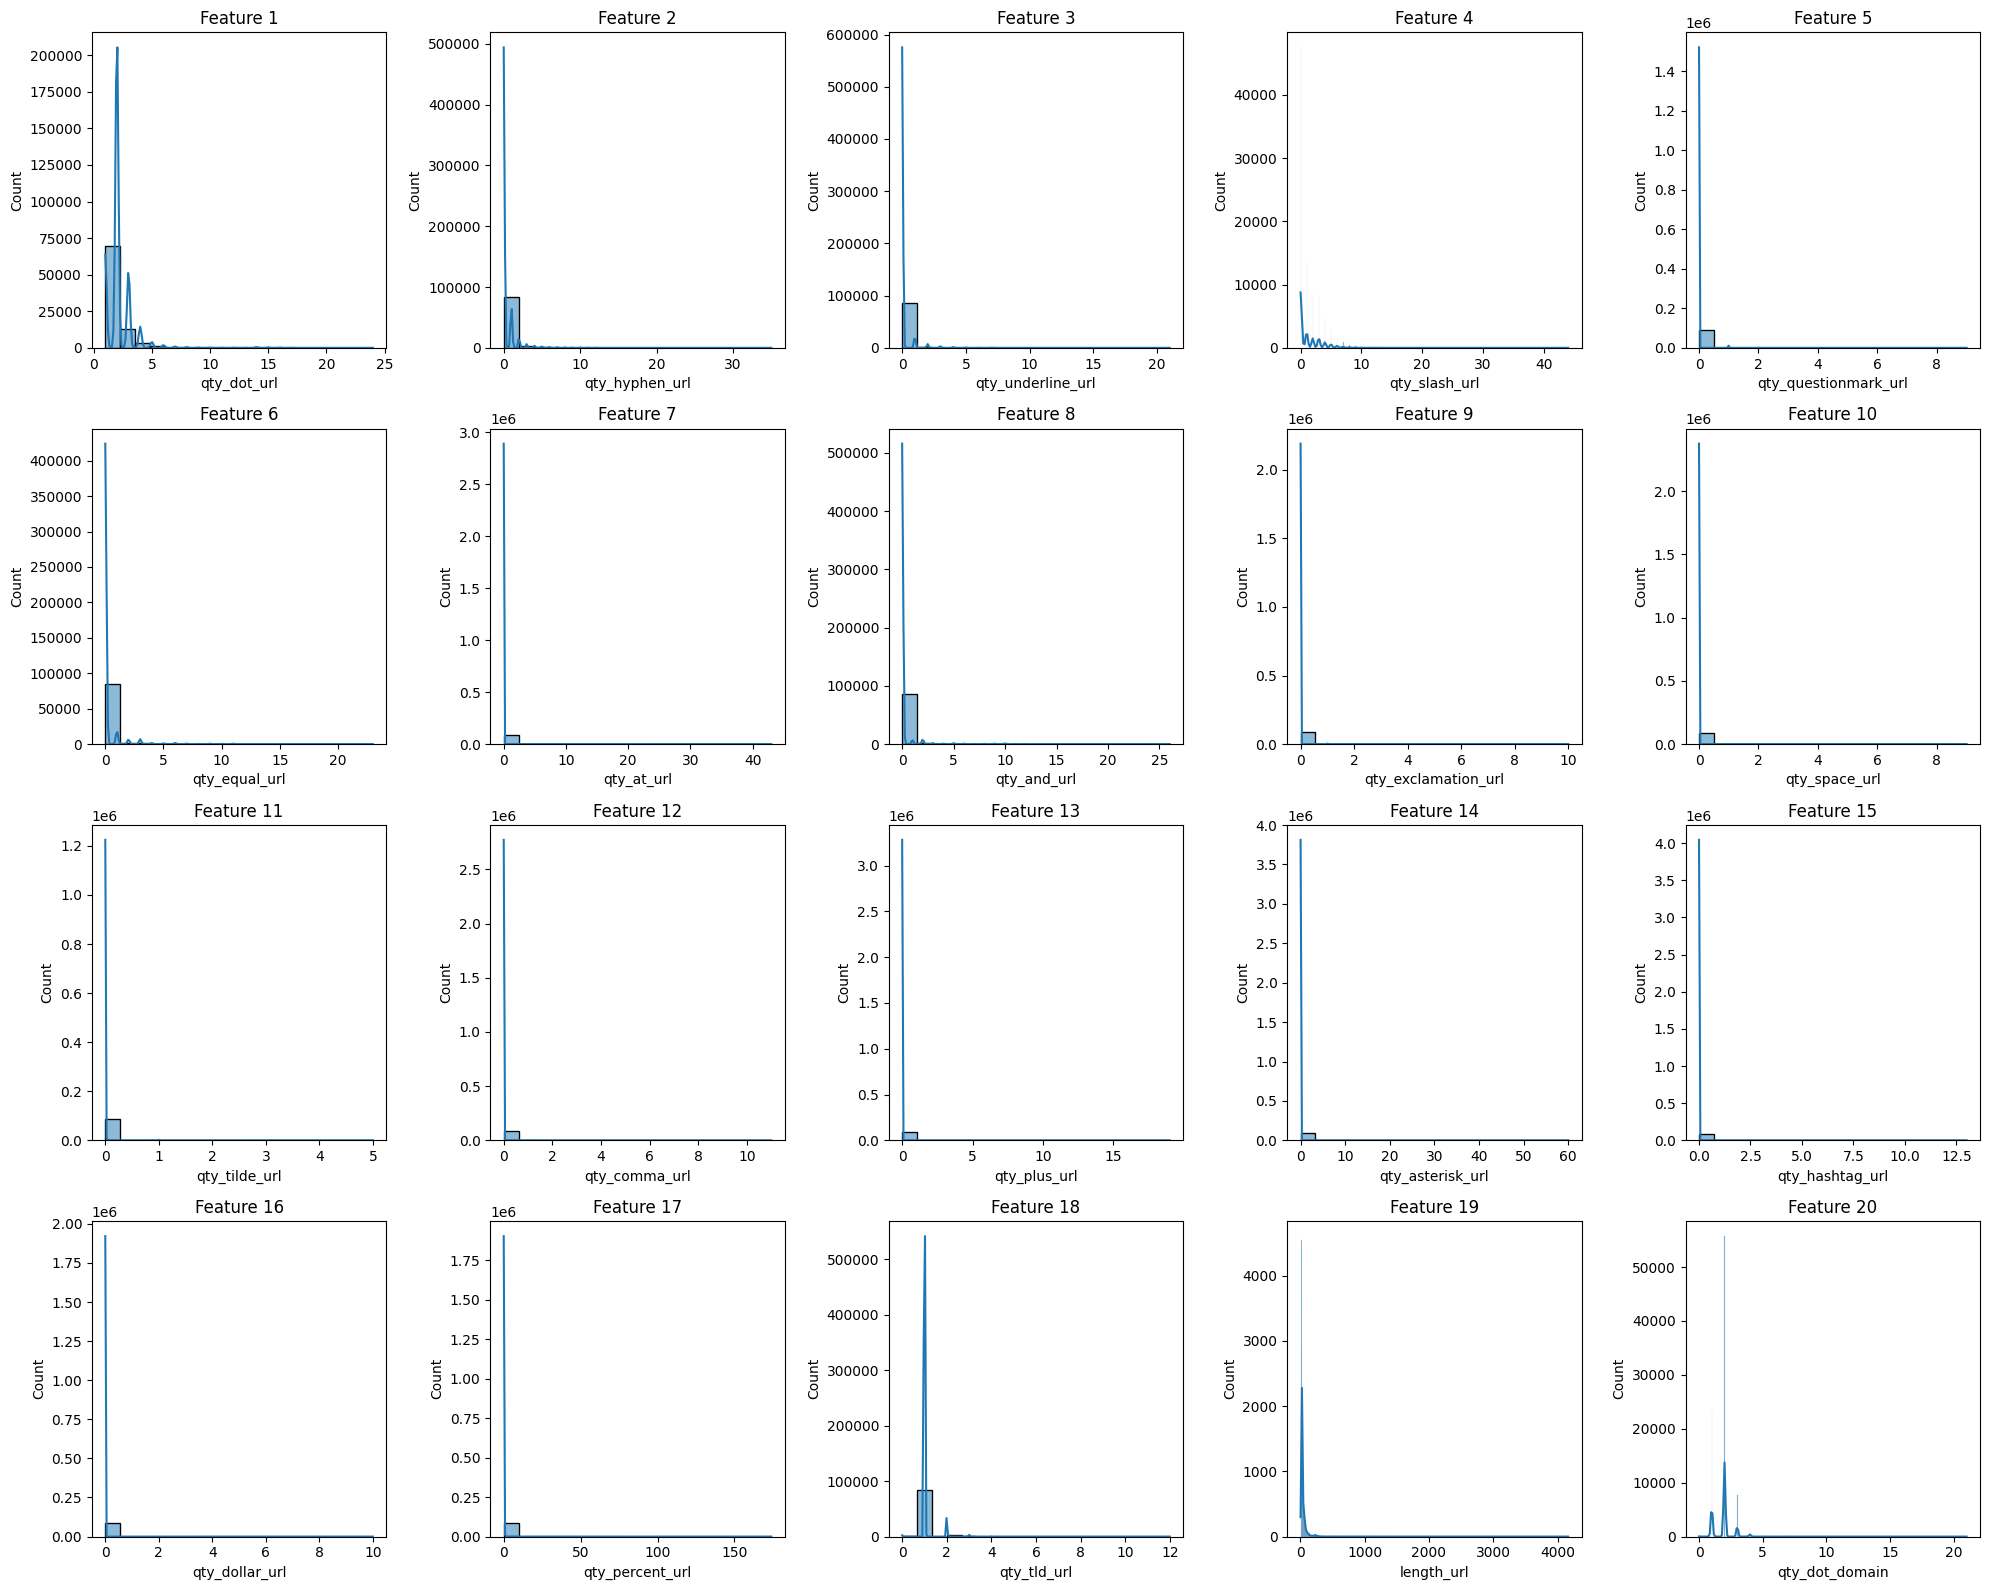

In [10]:
# Extract the first 20 features
features_20 = df.iloc[:, :20]

# Set up figure and axis for subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Plot histograms for each feature
for i, ax in enumerate(axes.flatten()):
    sns.histplot(features_20.iloc[:, i], ax=ax, kde=True)
    ax.set_title(f'Feature {i+1}')

# Adjust layout and display
plt.tight_layout()
plt.show()

##### Distribution of Domain features

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

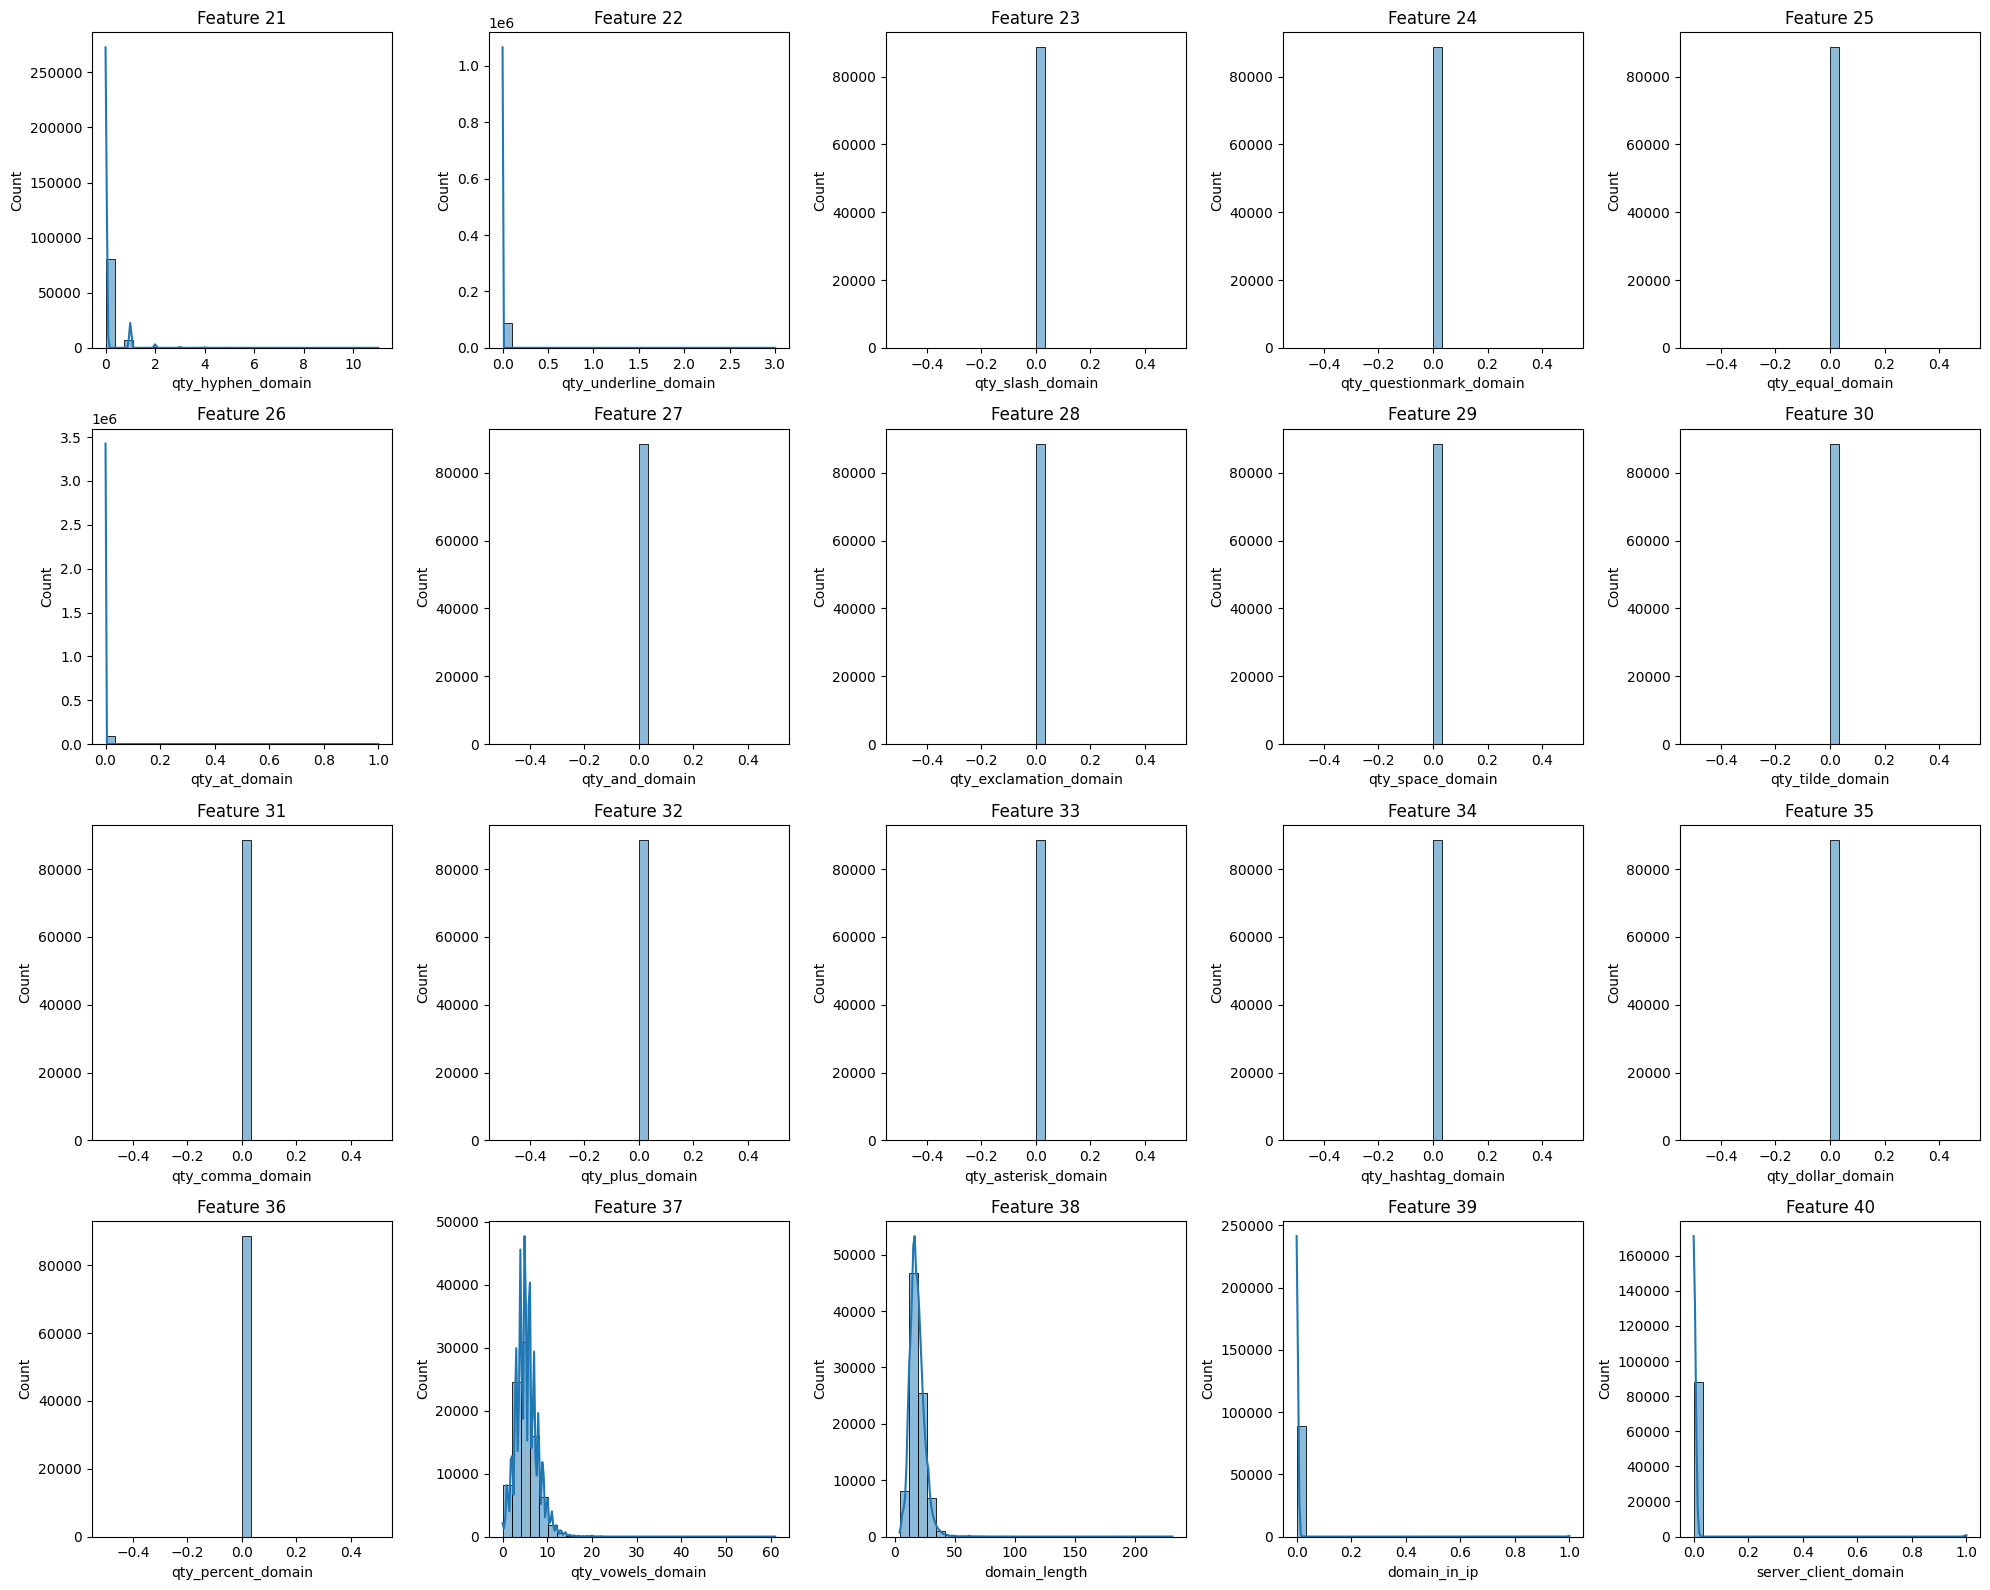

In [11]:
# Extract the features from the 21st to the 42nd column (0-based indexing)
features_21_to_42 = df.iloc[:, 20:42]

# Set up figure and axis for subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Plot histograms for each feature
for i, ax in enumerate(axes.flatten()):
    if i < len(features_21_to_42.columns):
        sns.histplot(features_21_to_42.iloc[:, i], ax=ax, bins=30, kde=True)  # Adjust the number of bins as needed
        ax.set_title(f'Feature {i+21}')

# Adjust layout and display
plt.tight_layout()
plt.show()

##### Distrubtion of Directory Features

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

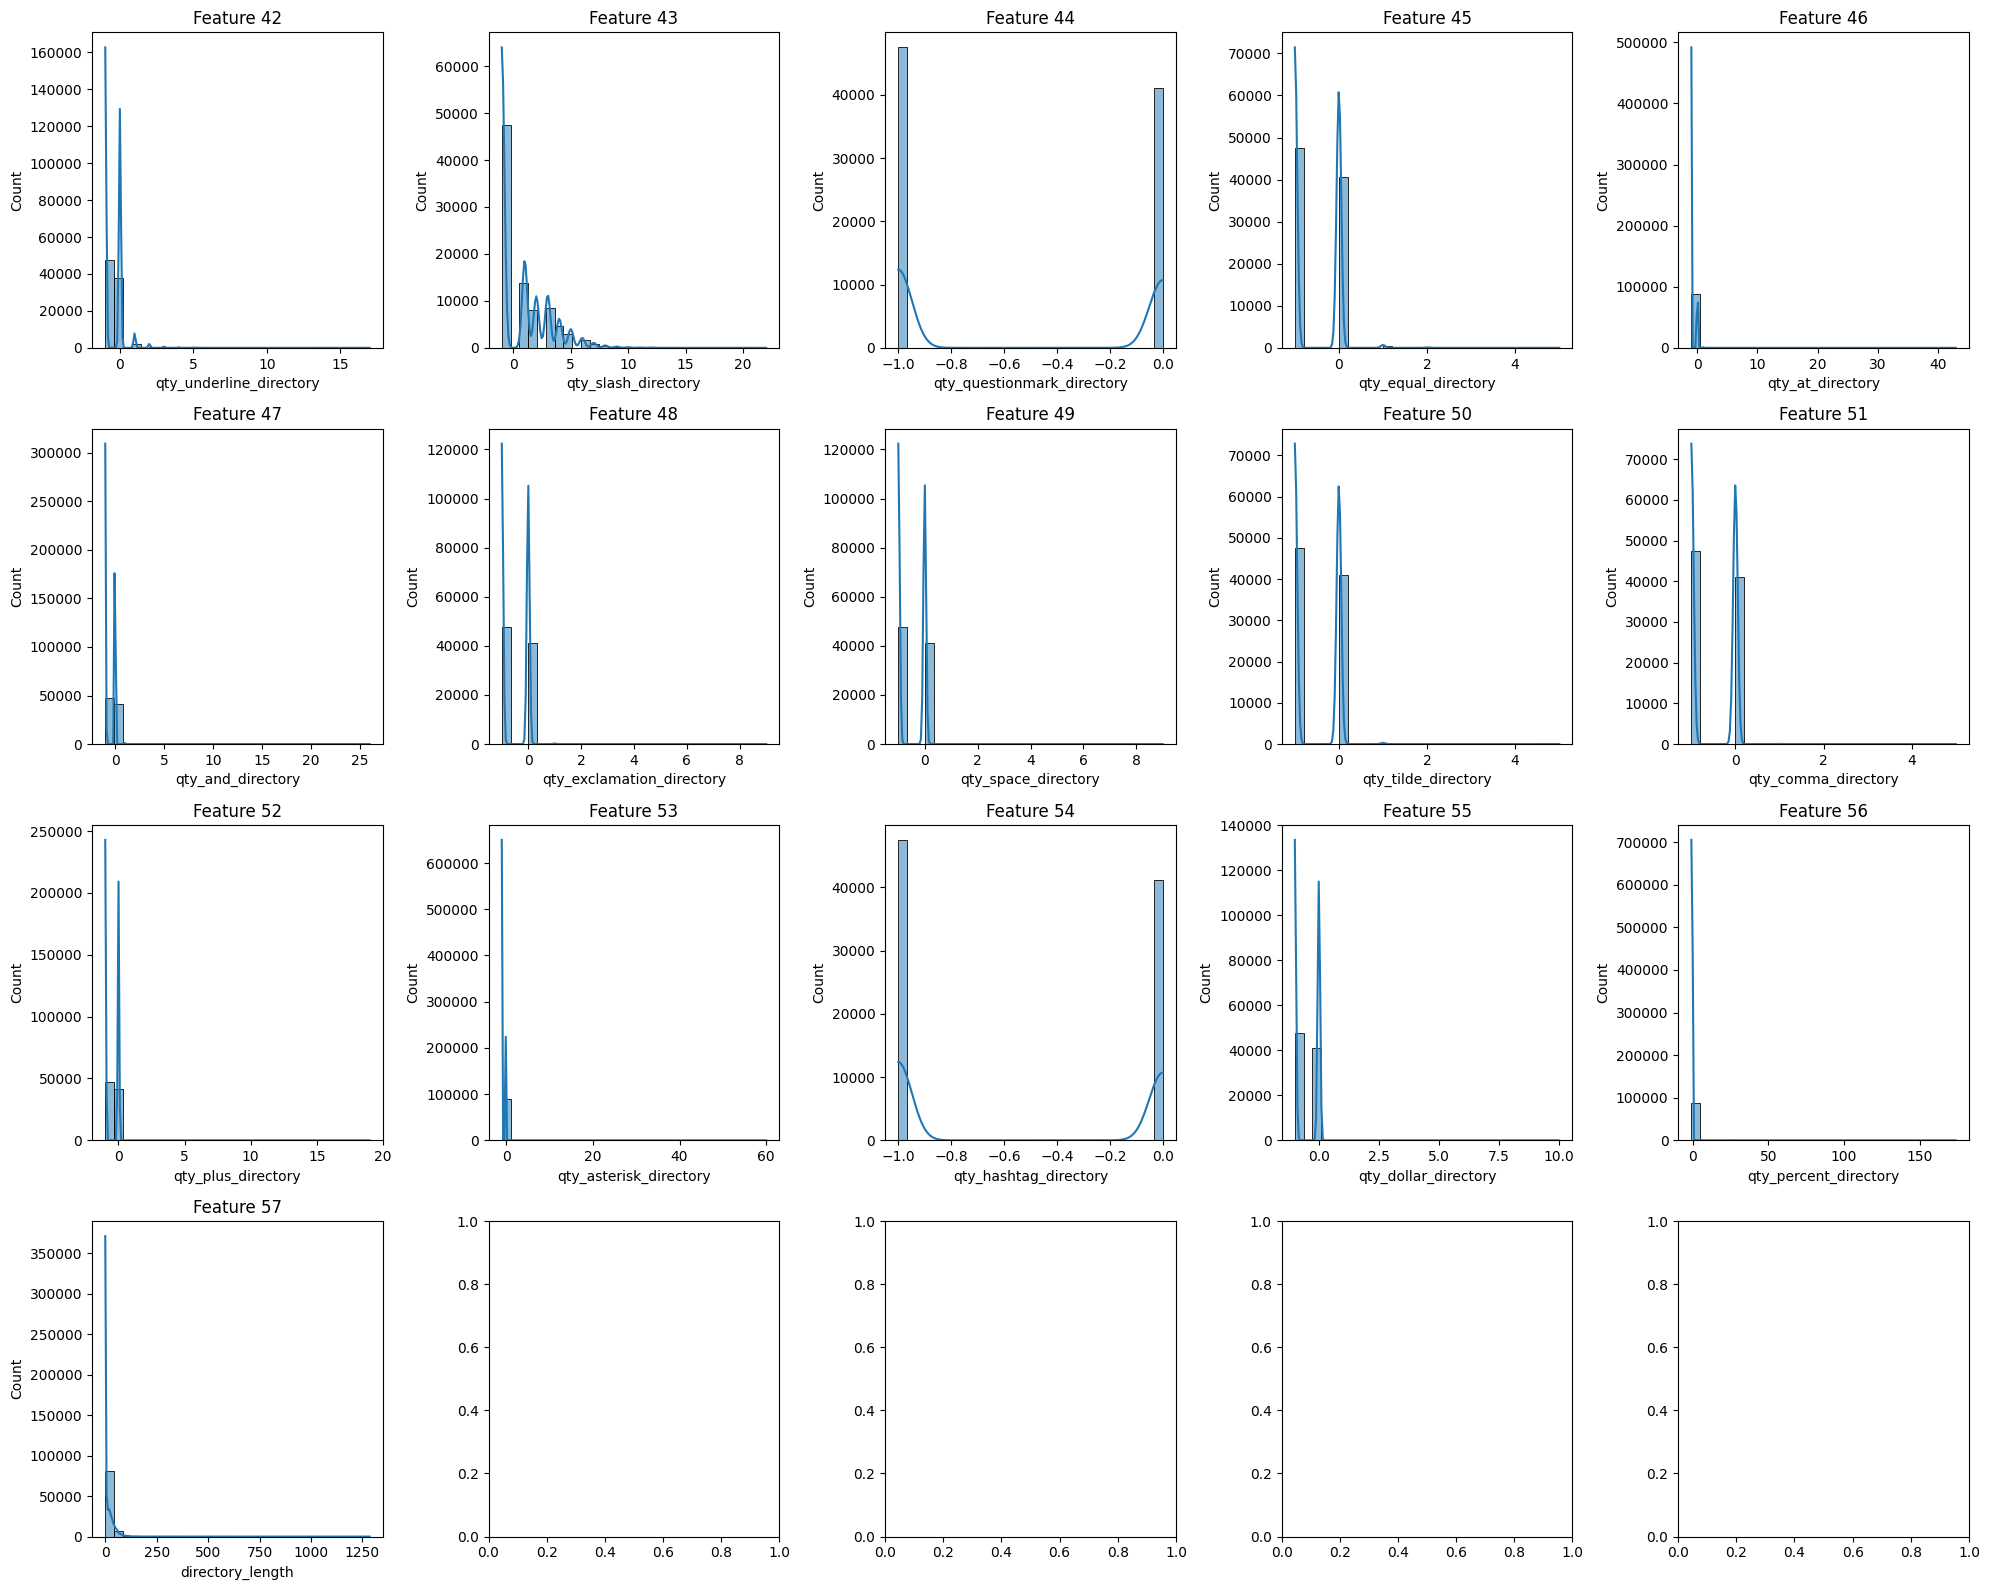

In [12]:
# Extract the features from the 42nd to the 60th column (0-based indexing)
features_42_to_58 = df.iloc[:, 42:58]

# Set up figure and axis for subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Plot histograms for each feature
for i, ax in enumerate(axes.flatten()):
    if i < len(features_42_to_58.columns):
        sns.histplot(features_42_to_58.iloc[:, i], ax=ax, bins=30, kde=True)  # Adjust the number of bins as needed
        ax.set_title(f'Feature {i+42}')

# Adjust layout and display
plt.tight_layout()
plt.show()

##### Distribution File Path Features

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

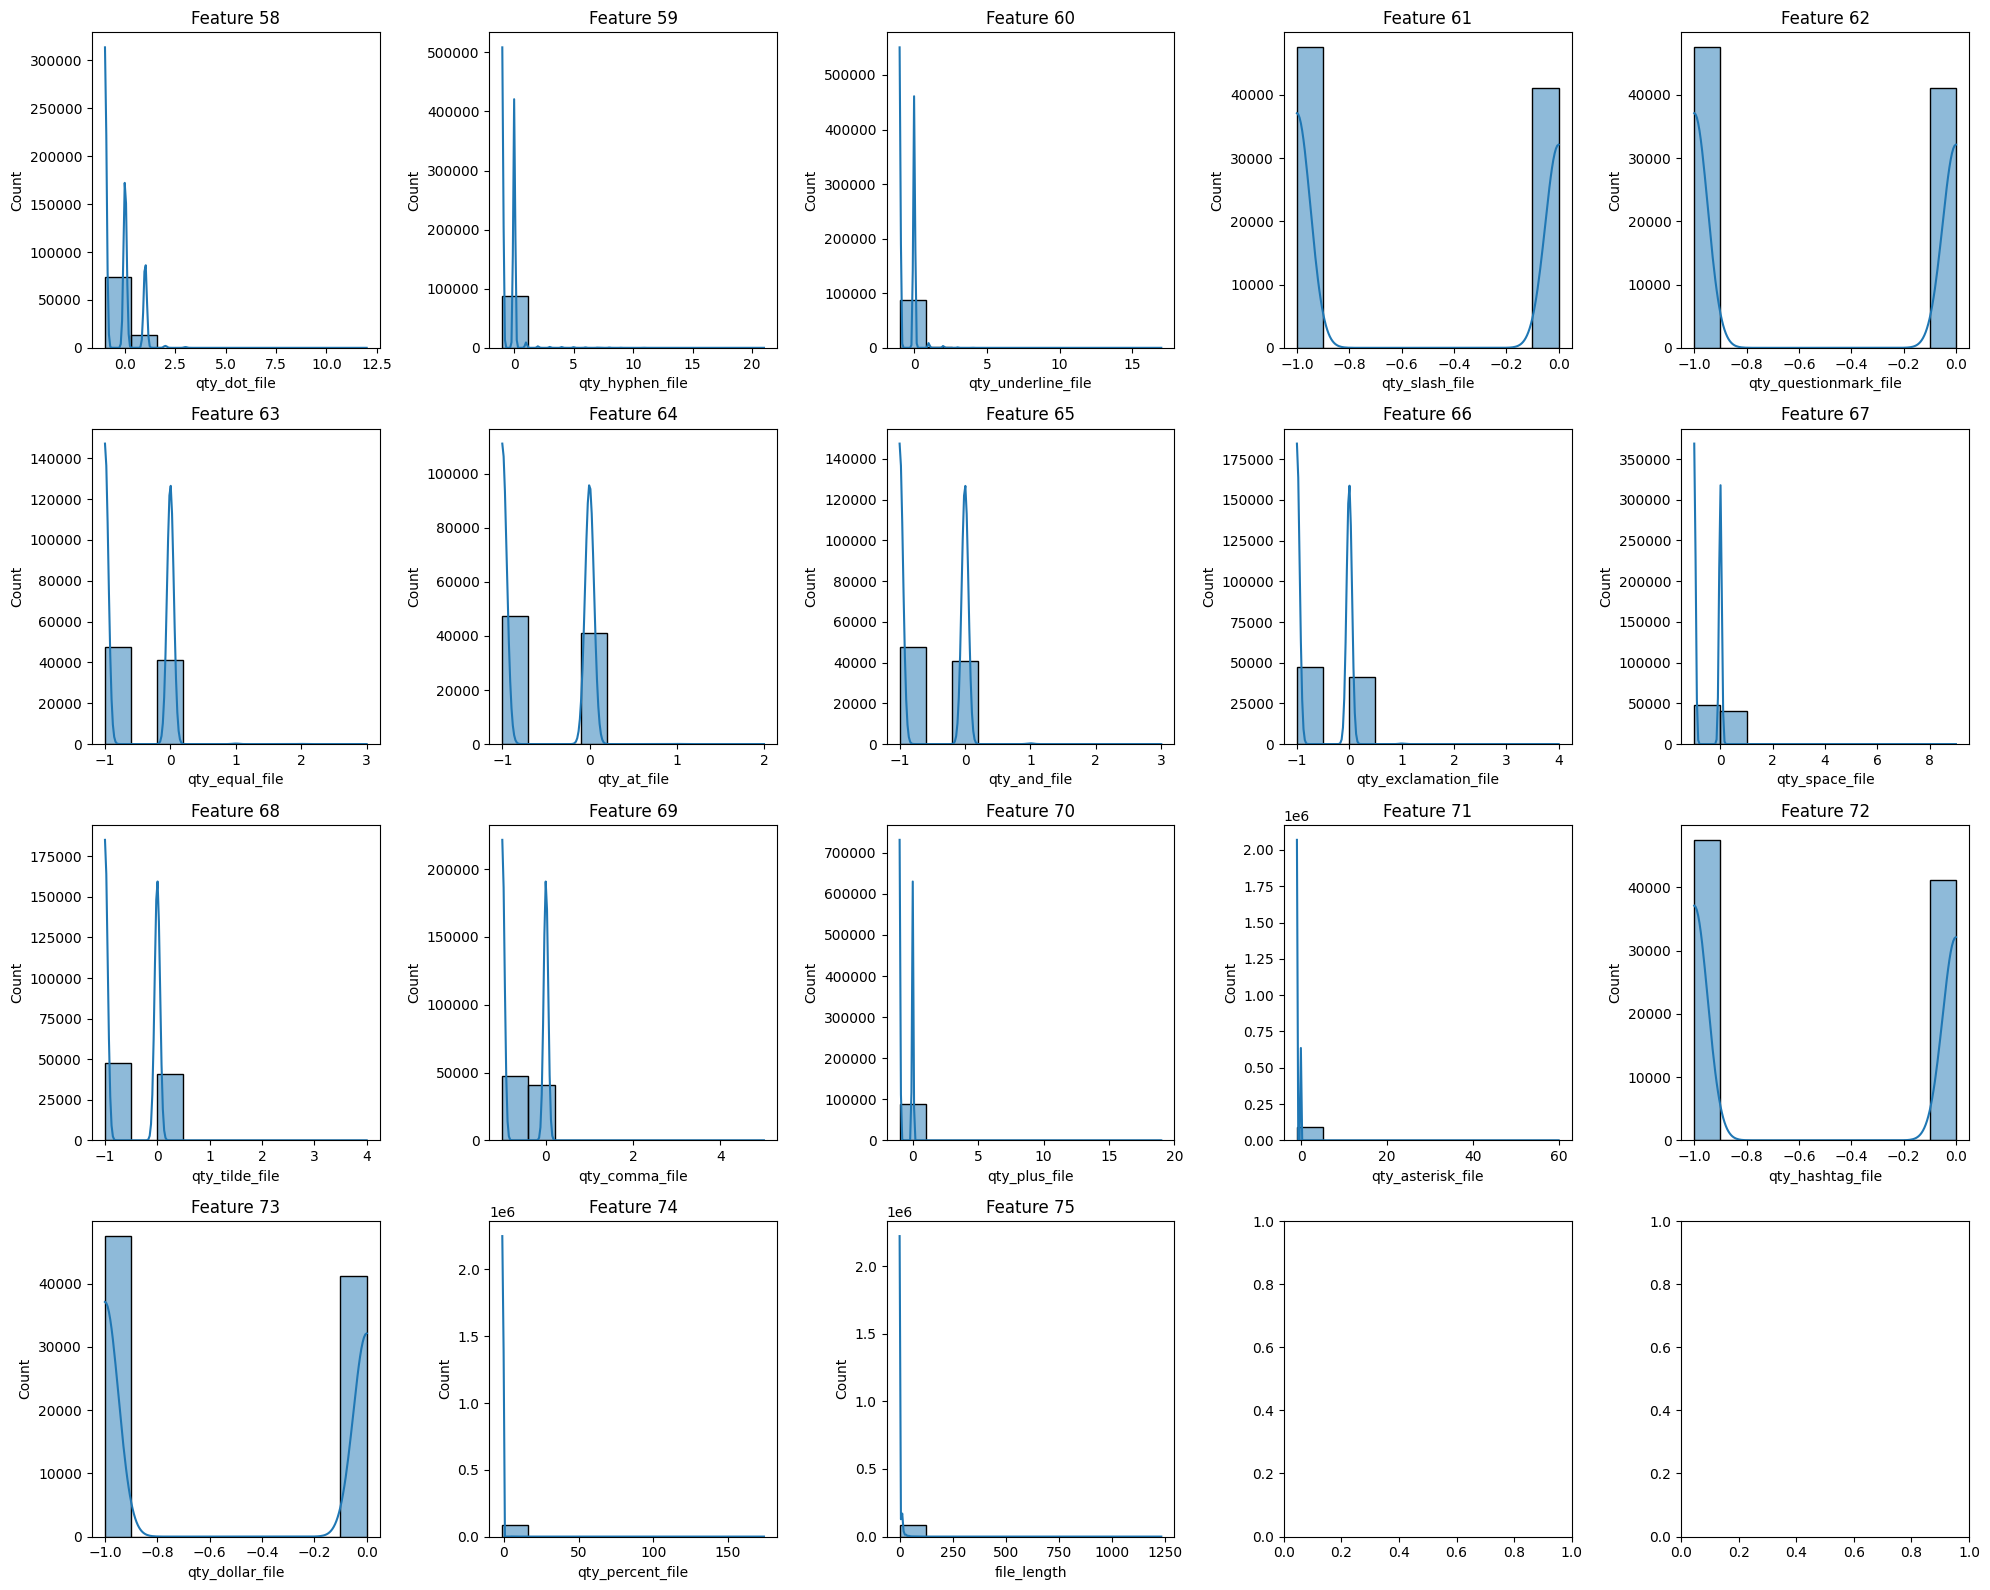

In [13]:
# Extract the features from the 42nd to the 60th column (0-based indexing)
features_58_to_76 = df.iloc[:, 58:76]

# Set up figure and axis for subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Plot histograms for each feature
for i, ax in enumerate(axes.flatten()):
    if i < len(features_58_to_76.columns):
        sns.histplot(features_58_to_76.iloc[:, i], ax=ax, bins=10, kde=True)  # Adjust the number of bins as needed
        ax.set_title(f'Feature {i+58}')

# Adjust layout and display
plt.tight_layout()
plt.show()

##### Distribution Parameter features

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

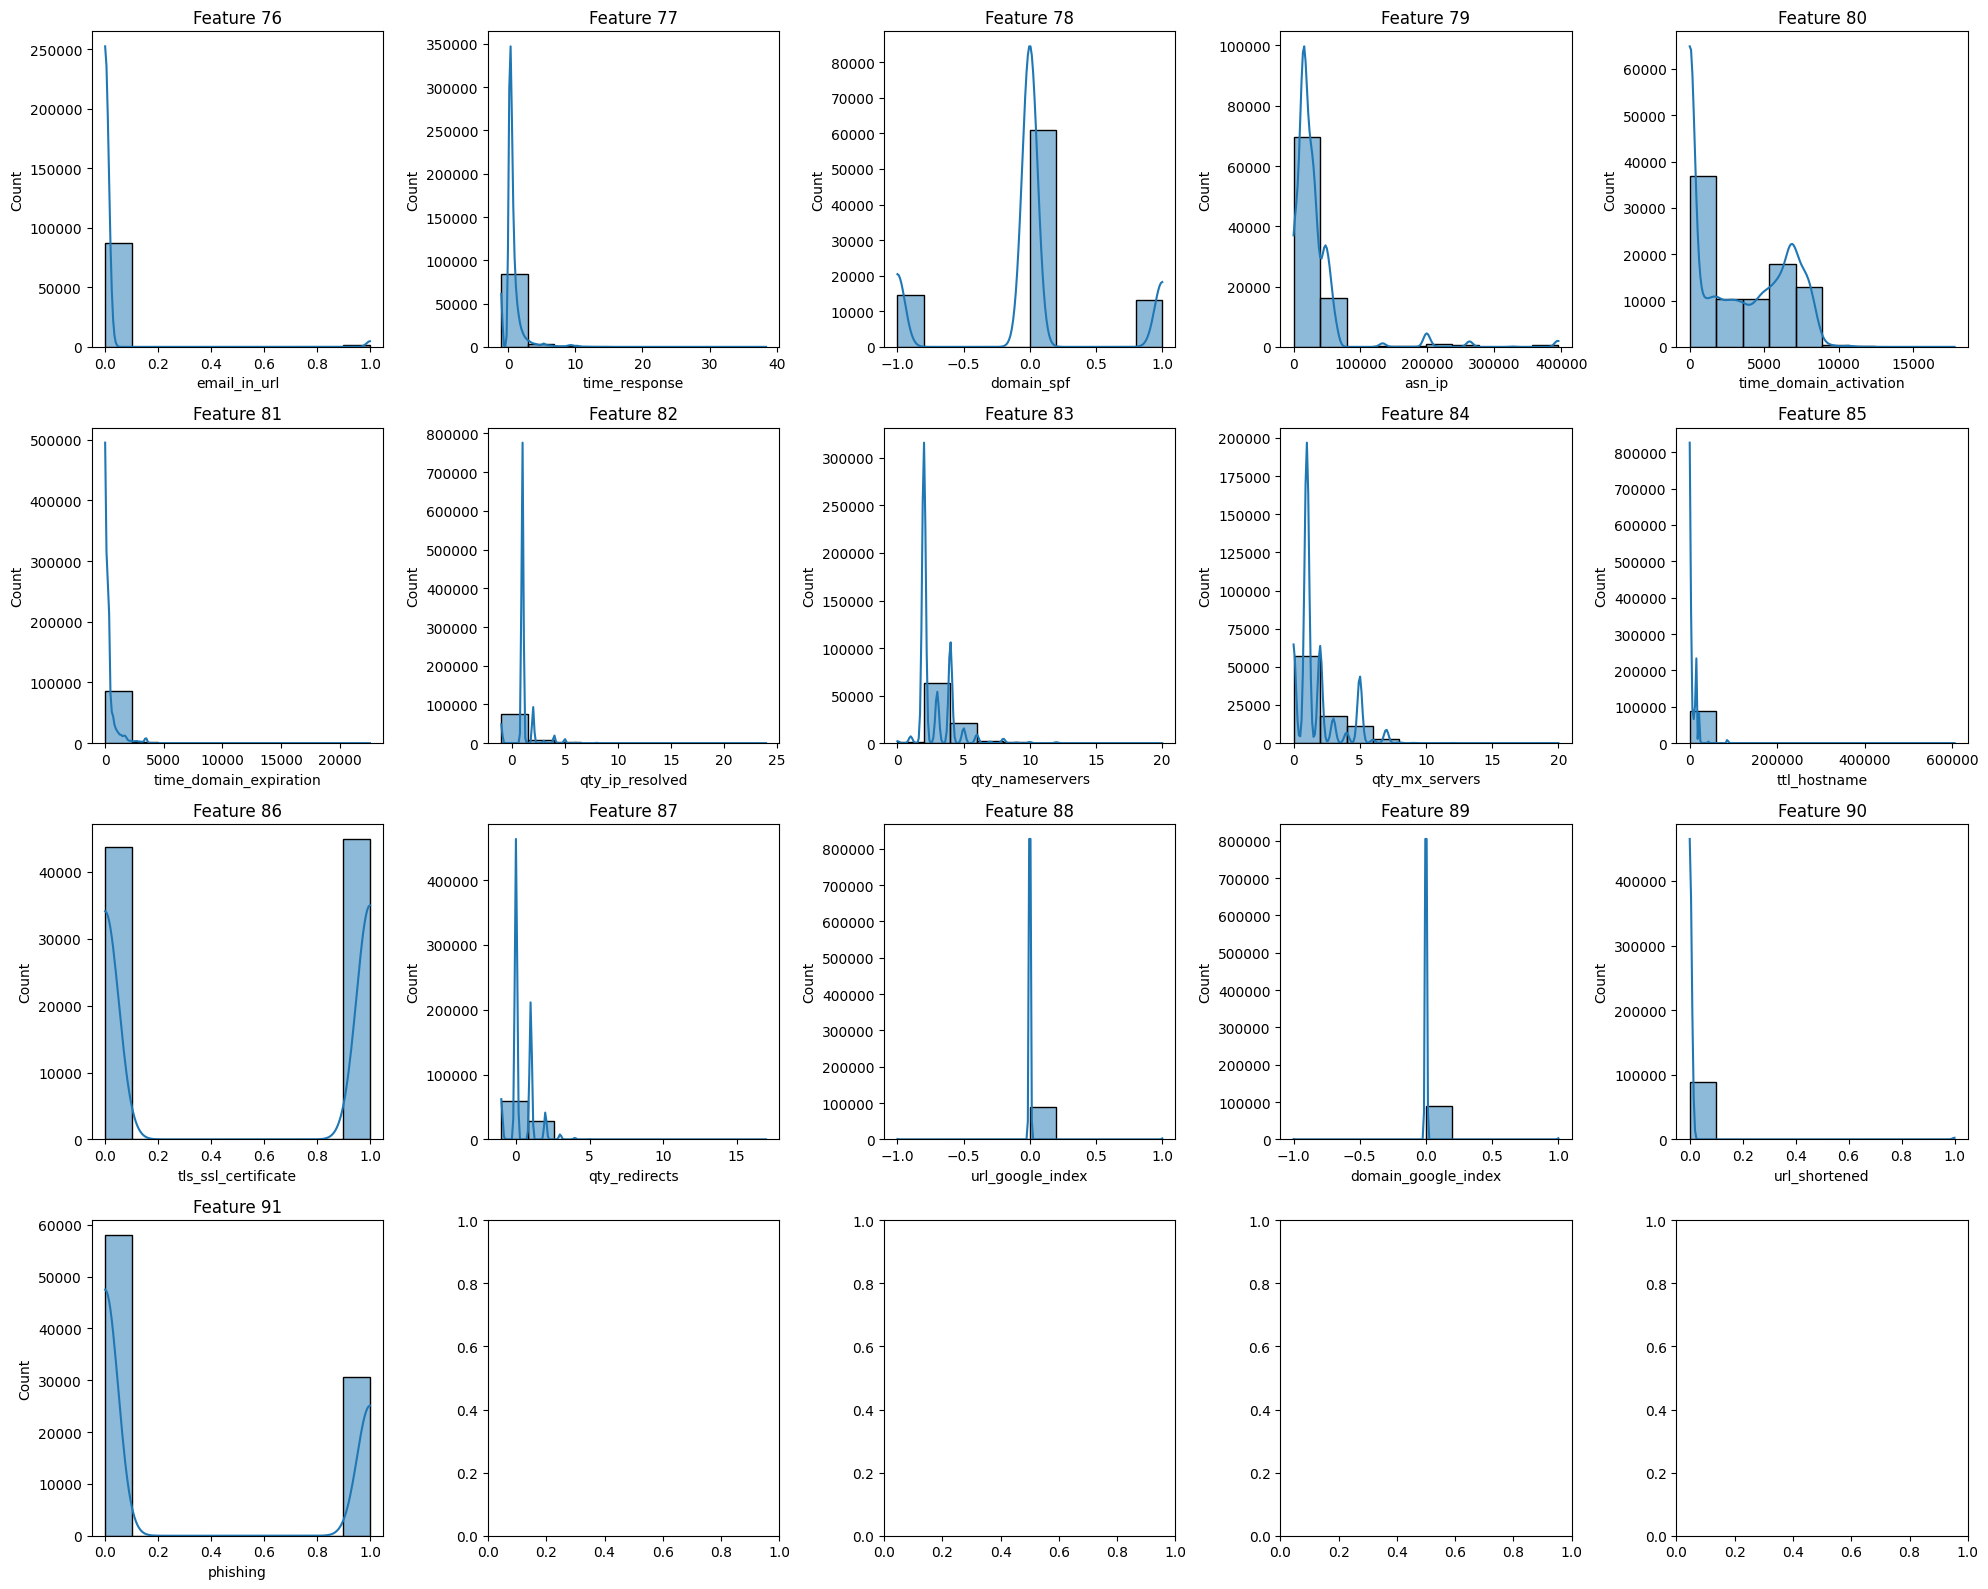

In [14]:
# Extract the features from the 42nd to the 60th column (0-based indexing)
features_76_to_96 = df.iloc[:, 76:96]

# Set up figure and axis for subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Plot histograms for each feature
for i, ax in enumerate(axes.flatten()):
    if i < len(features_76_to_96.columns):
        sns.histplot(features_76_to_96.iloc[:, i], ax=ax, bins=10, kde=True)  # Adjust the number of bins as needed
        ax.set_title(f'Feature {i+76}')

# Adjust layout and display
plt.tight_layout()
plt.show()

##### Distribution of External Service Features

##### Correlation Matrix

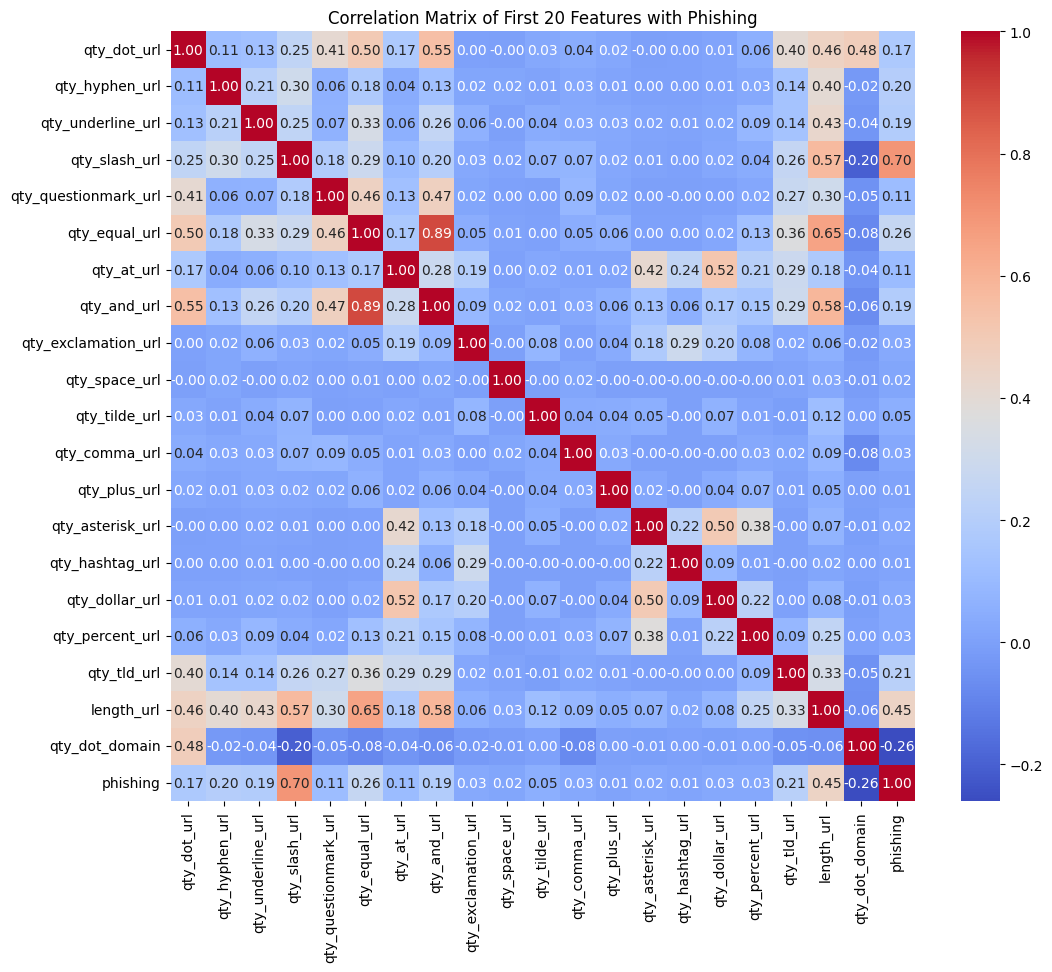

In [15]:
# Extract the first 20 features
features_20 = df.iloc[:, :20]

# Add 'phishing' as the last column
features_20['phishing'] = df['phishing']

# Calculate the correlation matrix
correlation_matrix = features_20.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of First 20 Features with Phishing')
plt.show()



###### So here i noticed for example that there is a strong correlation between the quantity of slashes in the URL and phishing

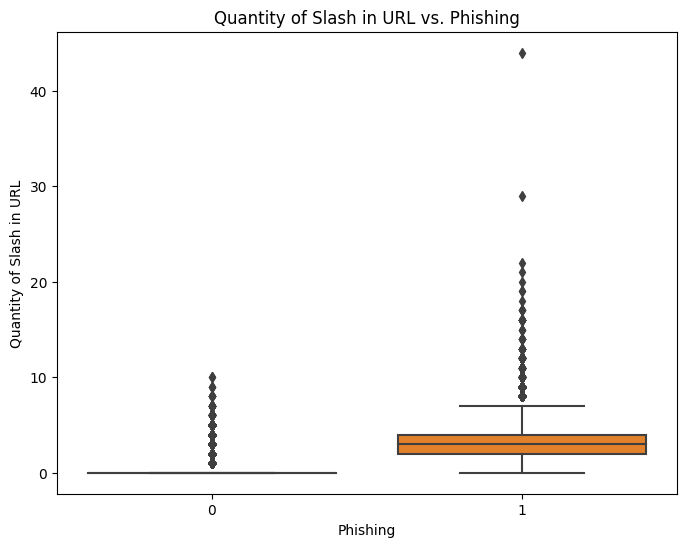

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'qty_slash_url' and 'phishing' columns
plt.figure(figsize=(8, 6))
sns.boxplot(x='phishing', y='qty_slash_url', data=df)
plt.xlabel('Phishing')
plt.ylabel('Quantity of Slash in URL')
plt.title('Quantity of Slash in URL vs. Phishing')
plt.show()


###### Plot above shows that a higher amount of slashes indicates that it is more likely that a website link is phishing.

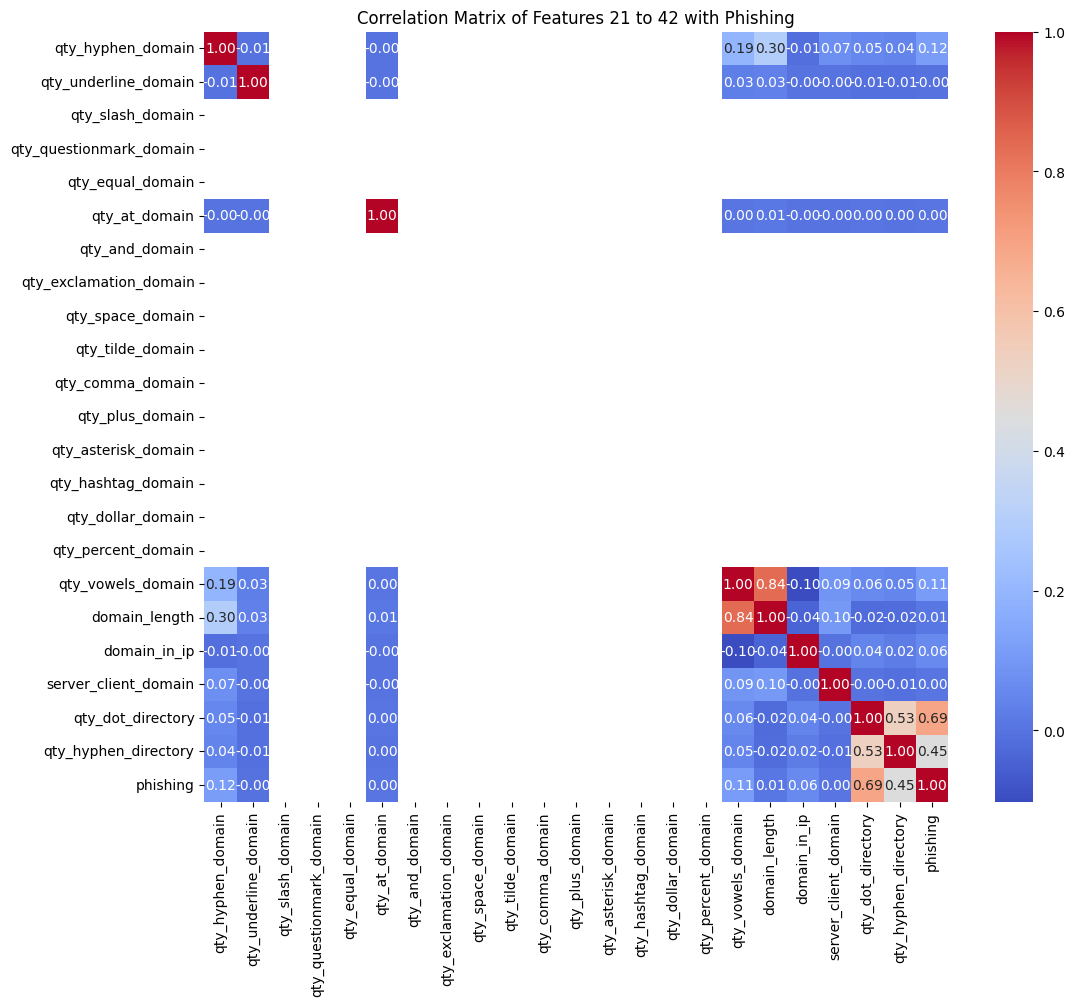

In [17]:
# Extract features 21 to 42
features_21_to_42 = df.iloc[:, 20:42]

# Add 'phishing' as the last column
features_21_to_42['phishing'] = df['phishing']

# Calculate the correlation matrix
correlation_matrix = features_21_to_42.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features 21 to 42 with Phishing')
plt.show()


Many White cells suggests that many domain features are not correlated with each other

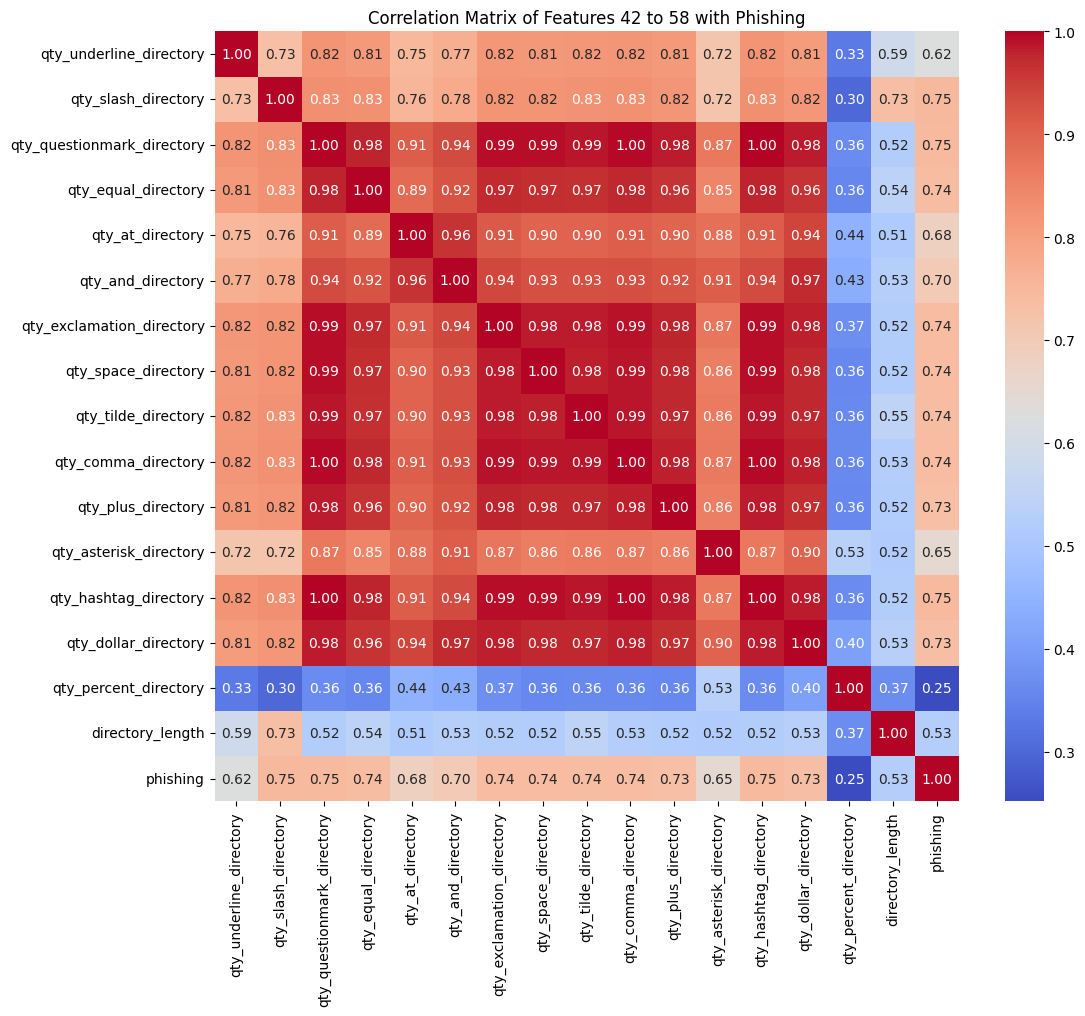

In [18]:
# Extract features 42 to 58
features_42_to_58 = df.iloc[:, 42:58]

# Add 'phishing' as the last column
features_42_to_58['phishing'] = df['phishing']

# Calculate the correlation matrix
correlation_matrix = features_42_to_58.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features 42 to 58 with Phishing')
plt.show()


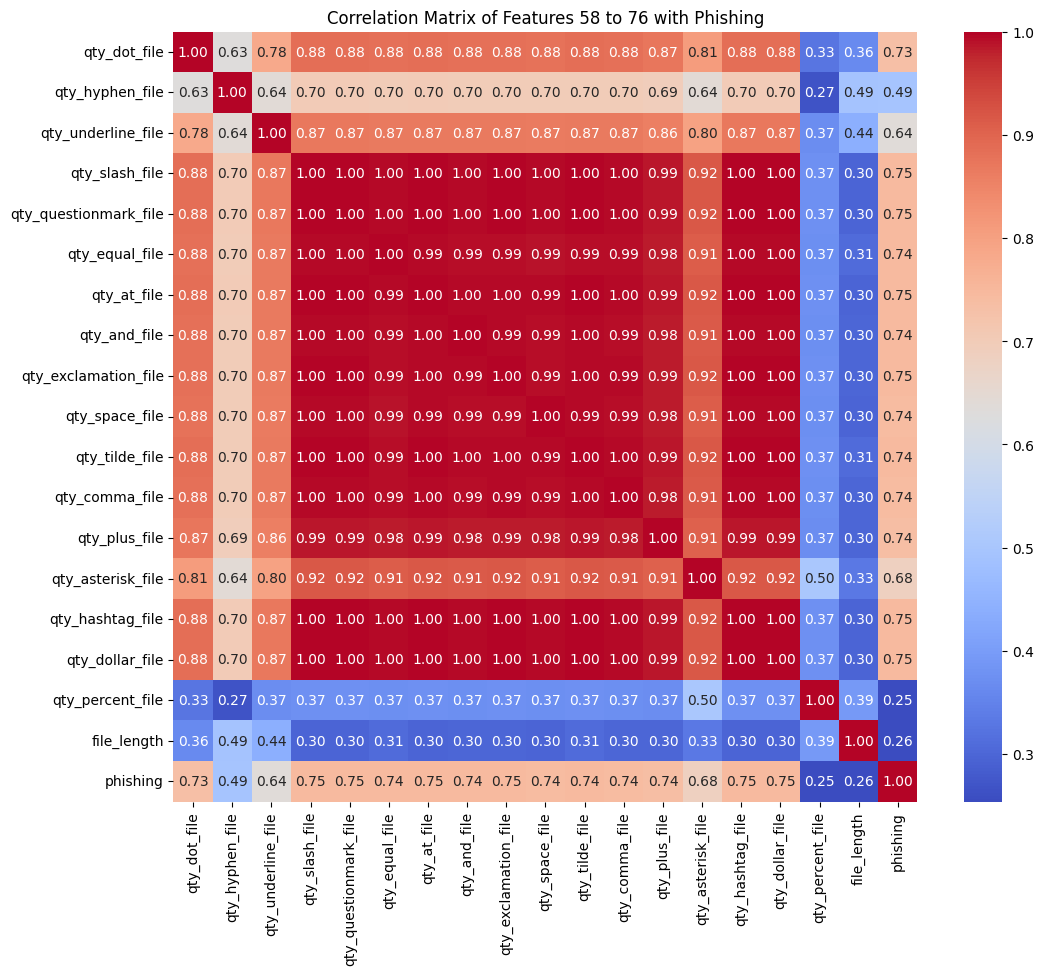

In [19]:
# Extract features 58 to 76
features_58_to_76 = df.iloc[:, 58:76]

# Add 'phishing' as the last column
features_58_to_76['phishing'] = df['phishing']

# Calculate the correlation matrix
correlation_matrix = features_58_to_76.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features 58 to 76 with Phishing')
plt.show()


In [20]:
# Import pandas
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set pandas display options to show all columns and rows without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Calculate the correlation matrix with a minimum number of valid observations
correlation_matrix = df.corr(min_periods=1)

# Filter correlations greater than 0.8 or less than -0.8
high_correlations = correlation_matrix[(correlation_matrix > 0.9) | (correlation_matrix < -0.9)]

# Print the filtered correlation matrix
# Iterate through the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Check if the correlation is greater than 0.8 or less than -0.8
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            print(f"Features '{correlation_matrix.columns[i]}' and '{correlation_matrix.columns[j]}' are heavily correlated: {correlation_matrix.iloc[i, j]}")








Features 'qty_slash_url' and 'qty_slash_directory' are heavily correlated: 0.9636036959010837
Features 'qty_dot_directory' and 'qty_dot_file' are heavily correlated: 0.9152901786437224
Features 'qty_underline_directory' and 'qty_underline_file' are heavily correlated: 0.9347678331707666
Features 'qty_questionmark_directory' and 'qty_equal_directory' are heavily correlated: 0.9785376124911006
Features 'qty_questionmark_directory' and 'qty_at_directory' are heavily correlated: 0.910401747531735
Features 'qty_questionmark_directory' and 'qty_and_directory' are heavily correlated: 0.9355426957860872
Features 'qty_questionmark_directory' and 'qty_exclamation_directory' are heavily correlated: 0.9928814986179689
Features 'qty_questionmark_directory' and 'qty_space_directory' are heavily correlated: 0.9912588459970124
Features 'qty_questionmark_directory' and 'qty_tilde_directory' are heavily correlated: 0.988239999249894
Features 'qty_questionmark_directory' and 'qty_comma_directory' are hea

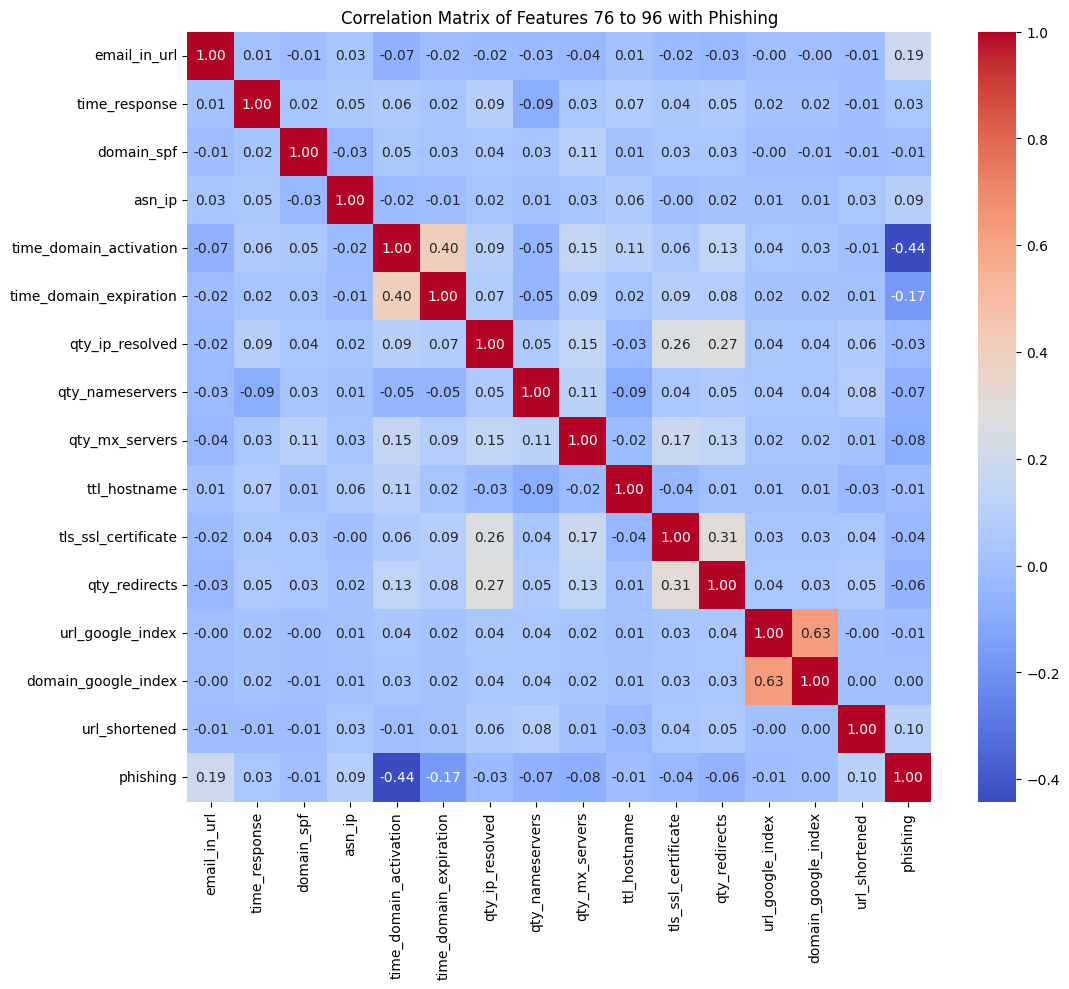

In [21]:
# Extract features 76 to 96
features_76_to_96 = df.iloc[:, 76:96]

# Add 'phishing' as the last column
features_76_to_96['phishing'] = df['phishing']

# Calculate the correlation matrix
correlation_matrix = features_76_to_96.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features 76 to 96 with Phishing')
plt.show()


#### Now that we have done the correlation matrix, we have decided to only keep the URL features as the other features are either lacking, or high levels of correlation is present.

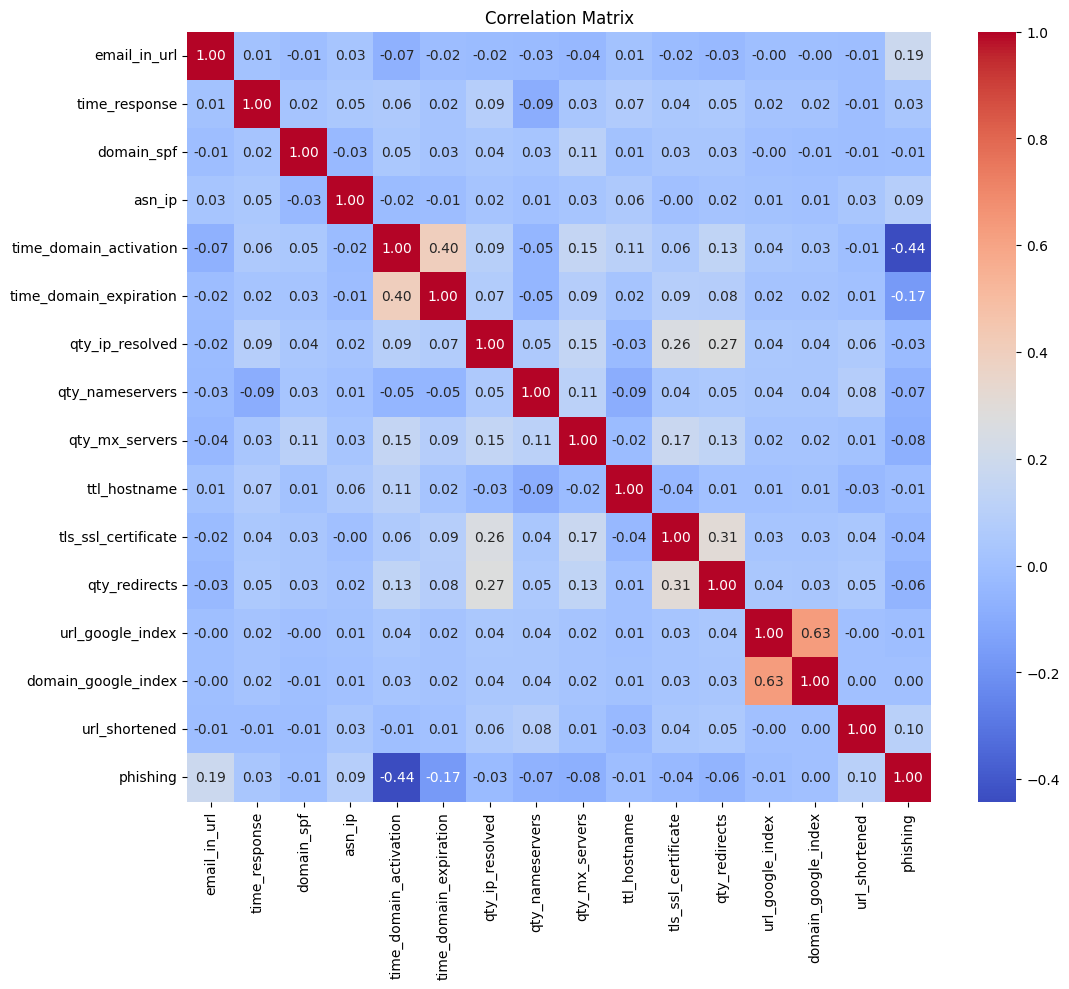

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Machine Learning models
#### Baseline model: Random Forest 
###### Now that we have explored the data we continue with building the algorithms
###### What we first need to do before diving into the algorithms is splitting the data into training/validation/test sets

In [23]:
from sklearn.model_selection import train_test_split

# Assuming 'phishing' is your dependent feature and X contains your independent features
X = df.drop(columns=['phishing'])
y = df['phishing']

# Perform an initial split to separate out the test set (20%)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the remaining data into training (60%) and validation (20%) sets
# Since the test set has already been separated, we use the remaining portion (80%) for this split
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)

# Now, X_train, y_train are the training data and labels (60% of the original data)
# X_val, y_val are the validation data and labels (20% of the original data)
# X_test, y_test are the test data and labels (20% of the original data)


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import time


# Train Random Forest classifier to obtain feature importances
rf_classifier10 = RandomForestClassifier(random_state=42)
rf_classifier10.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = rf_classifier10.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 10
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 10)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
selector = SelectFromModel(rf_classifier10, threshold=-float('inf'), max_features=top_n)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Define hyperparameters for tuning using the selected features
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier10, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_rf10 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_rf10.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_rf10 = accuracy_score(y_val, y_pred_val)
precision_rf10 = precision_score(y_val, y_pred_val)
recall_rf10 = recall_score(y_val, y_pred_val)
f1_rf10 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_rf10}")
print(f"Precision: {precision_rf10}")
print(f"Recall: {recall_rf10}")
print(f"F1-Score: {f1_rf10}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test10 = best_estimator_rf10.predict(X_test_selected)
end_time = time.time()
prediction_time_test_rf10 = end_time - start_time


# Evaluate the model on test set
y_pred_test10 = best_estimator_rf10.predict(X_test_selected)
test_accuracy_rf10 = accuracy_score(y_test, y_pred_test10)
test_precision_rf10 = precision_score(y_test, y_pred_test10)
test_recall_rf10 = recall_score(y_test, y_pred_test10)
test_f1_rf10 = f1_score(y_test, y_pred_test10)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_rf10}")
print(f"Precision: {test_precision_rf10}")
print(f"Recall: {test_recall_rf10}")
print(f"F1-Score: {test_f1_rf10}")
print(f"Prediction Time on Test Set: {prediction_time_test_rf10} seconds")


###### Now perform a random forest model with 15 features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train Random Forest classifier to obtain feature importances
rf_classifier15 = RandomForestClassifier(random_state=42)
rf_classifier15.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = rf_classifier15.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 15 most important features
top_n = 15
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 15)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
selector = SelectFromModel(rf_classifier15, threshold=-float('inf'), max_features=top_n)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Define hyperparameters for tuning using the selected features
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier15, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_rf15 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_rf15.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_rf15 = accuracy_score(y_val, y_pred_val)
precision_rf15 = precision_score(y_val, y_pred_val)
recall_rf15 = recall_score(y_val, y_pred_val)
f1_rf15 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_rf15}")
print(f"Precision: {precision_rf15}")
print(f"Recall: {recall_rf15}")
print(f"F1-Score: {f1_rf15}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test15 = best_estimator_rf15.predict(X_test_selected)
end_time = time.time()
prediction_time_test_rf15 = end_time - start_time

# Evaluate the model on test set
y_pred_test15 = best_estimator_rf15.predict(X_test_selected)
test_accuracy_rf15 = accuracy_score(y_test, y_pred_test15)
test_precision_rf15 = precision_score(y_test, y_pred_test15)
test_recall_rf15 = recall_score(y_test, y_pred_test15)
test_f1_rf15 = f1_score(y_test, y_pred_test15)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_rf15}")
print(f"Precision: {test_precision_rf15}")
print(f"Recall: {test_recall_rf15}")
print(f"F1-Score: {test_f1_rf15}")
print(f"Prediction Time on Test Set: {prediction_time_test_rf15} seconds")


###### Now perform a Random Forest with the 20 most important features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import time

# Train Random Forest classifier to obtain feature importances
rf_classifier20 = RandomForestClassifier(random_state=42)
rf_classifier20.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = rf_classifier20.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 15 most important features
top_n = 20
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 20)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
selector = SelectFromModel(rf_classifier20, threshold=-float('inf'), max_features=top_n)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Define hyperparameters for tuning using the selected features
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier20, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_rf20 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set and measure time
start_time = time.time()
y_pred_val = best_estimator_rf20.predict(X_val_selected)
end_time = time.time()
prediction_time_val = end_time - start_time

# Evaluate the model on validation set
accuracy_rf20 = accuracy_score(y_val, y_pred_val)
precision_rf20 = precision_score(y_val, y_pred_val)
recall_rf20 = recall_score(y_val, y_pred_val)
f1_rf20 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_rf20}")
print(f"Precision: {precision_rf20}")
print(f"Recall: {recall_rf20}")
print(f"F1-Score: {f1_rf20}")
print(f"Prediction Time on Validation Set: {prediction_time_val} seconds")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test20 = best_estimator_rf20.predict(X_test_selected)
end_time = time.time()
prediction_time_test = end_time - start_time

# Evaluate the model on test set
test_accuracy_rf20 = accuracy_score(y_test, y_pred_test20)
test_precision_rf20 = precision_score(y_test, y_pred_test20)
test_recall_rf20 = recall_score(y_test, y_pred_test20)
test_f1_rf20 = f1_score(y_test, y_pred_test20)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_rf20}")
print(f"Precision: {test_precision_rf20}")
print(f"Recall: {test_recall_rf20}")
print(f"F1-Score: {test_f1_rf20}")
print(f"Prediction Time on Test Set: {prediction_time_test} seconds")


# Accuracy scores of the models
accuracy_scores = [accuracy_rf10, accuracy_rf15, accuracy_rf20]  # Replace with actual accuracy scores

# Model names
models = ['RF with 10 features', 'RF with 15 features', 'RF with 20 features']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Random Forest Models')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for accuracy score
plt.grid(axis='y')  # Show gridlines on the y-axis
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get confusion matrices for each model
cm_rf10 = confusion_matrix(y_test, y_pred_test10)
cm_rf15 = confusion_matrix(y_test, y_pred_test15)
cm_rf20 = confusion_matrix(y_test, y_pred_test20)

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_rf10, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - RF with 10 features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(cm_rf15, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - RF with 15 features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(cm_rf20, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - RF with 20 features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


#### Now lets move on to the next machine learning model: XGBoost
##### We first start with an XGBoost model with 10 features

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train XGBoost classifier
xgb_classifier10 = XGBClassifier(random_state=42)
xgb_classifier10.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = xgb_classifier10.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 10
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 10)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees
    'max_depth': [9, 11, 13, 15],  # Maximum depth of trees
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_classifier10, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_XGB10 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_XGB10.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_xgb10 = accuracy_score(y_val, y_pred_val)
precision_xgb10 = precision_score(y_val, y_pred_val)
recall_xgb10 = recall_score(y_val, y_pred_val)
f1_xgb10 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_xgb10}")
print(f"Precision: {precision_xgb10}")
print(f"Recall: {recall_xgb10}")
print(f"F1-Score: {f1_xgb10}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test10x = best_estimator_XGB10.predict(X_test_selected)
end_time = time.time()
prediction_time_test_xgb10 = end_time - start_time


# Evaluate the model on test set
y_pred_test10x = best_estimator_XGB10.predict(X_test_selected)
test_accuracy_xgb10 = accuracy_score(y_test, y_pred_test10x)
test_precision_xgb10 = precision_score(y_test, y_pred_test10x)
test_recall_xgb10 = recall_score(y_test, y_pred_test10x)
test_f1_xgb10 = f1_score(y_test, y_pred_test10x)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_xgb10}")
print(f"Precision: {test_precision_xgb10}")
print(f"Recall: {test_recall_xgb10}")
print(f"F1-Score: {test_f1_xgb10}")
print(f"Prediction Time on Test Set: {prediction_time_test_xgb10} seconds")


###### XGBoost with 15 features

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train XGBoost classifier
xgb_classifier15 = XGBClassifier(random_state=42)
xgb_classifier15.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = xgb_classifier15.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 15
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 15)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees
    'max_depth': [9, 11, 13, 15],  # Maximum depth of trees
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_classifier15, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_XGB15 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_XGB15.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_xgb15 = accuracy_score(y_val, y_pred_val)
precision_xgb15 = precision_score(y_val, y_pred_val)
recall_xgb15 = recall_score(y_val, y_pred_val)
f1_xgb15 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_xgb15}")
print(f"Precision: {precision_xgb15}")
print(f"Recall: {recall_xgb15}")
print(f"F1-Score: {f1_xgb15}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test10x = best_estimator_XGB15.predict(X_test_selected)
end_time = time.time()
prediction_time_test_xgb15 = end_time - start_time

# Evaluate the model on test set
y_pred_test15x = best_estimator_XGB15.predict(X_test_selected)
test_accuracy_xgb15 = accuracy_score(y_test, y_pred_test15x)
test_precision_xgb15 = precision_score(y_test, y_pred_test15x)
test_recall_xgb15 = recall_score(y_test, y_pred_test15x)
test_f1_xgb15 = f1_score(y_test, y_pred_test15x)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_xgb15}")
print(f"Precision: {test_precision_xgb15}")
print(f"Recall: {test_recall_xgb15}")
print(f"F1-Score: {test_f1_xgb15}")
print(f"Prediction Time on Test Set: {prediction_time_test_xgb15} seconds")


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train XGBoost classifier
xgb_classifier20 = XGBClassifier(random_state=42)
xgb_classifier20.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = xgb_classifier20.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 20
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 20)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees
    'max_depth': [9, 11, 13, 15],  # Maximum depth of trees
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_classifier20, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_XGB20 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_XGB20.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_xgb20 = accuracy_score(y_val, y_pred_val)
precision_xgb20 = precision_score(y_val, y_pred_val)
recall_xgb20 = recall_score(y_val, y_pred_val)
f1_xgb20 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_xgb20}")
print(f"Precision: {precision_xgb20}")
print(f"Recall: {recall_xgb20}")
print(f"F1-Score: {f1_xgb20}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test10x = best_estimator_XGB20.predict(X_test_selected)
end_time = time.time()
prediction_time_test_xgb20 = end_time - start_time

# Evaluate the model on test set
y_pred_test20x = best_estimator_XGB20.predict(X_test_selected)
test_accuracy_xgb20 = accuracy_score(y_test, y_pred_test20x)
test_precision_xgb20 = precision_score(y_test, y_pred_test20x)
test_recall_xgb20 = recall_score(y_test, y_pred_test20x)
test_f1_xgb20 = f1_score(y_test, y_pred_test20x)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_xgb20}")
print(f"Precision: {test_precision_xgb20}")
print(f"Recall: {test_recall_xgb20}")
print(f"F1-Score: {test_f1_xgb20}")
print(f"Prediction Time on Test Set: {prediction_time_test_xgb20} seconds")


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get confusion matrices for each model
cm_xgb10 = confusion_matrix(y_test, y_pred_test10x)
cm_xgb15 = confusion_matrix(y_test, y_pred_test15x)
cm_xgb20 = confusion_matrix(y_test, y_pred_test20x)

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_xgb10, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGB with 10 features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(cm_xgb15, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - XGB with 15 features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(cm_xgb20, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - XGB with 20 features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


### Now we move on to the ADA boost model
###### And we begin with 10 features

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train AdaBoost classifier
ada_classifier10 = AdaBoostClassifier(random_state=42)
ada_classifier10.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = ada_classifier10.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 10
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 10)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ada_classifier10, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_ada10 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_ada10.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_ada10 = accuracy_score(y_val, y_pred_val)
precision_ada10 = precision_score(y_val, y_pred_val)
recall_ada10 = recall_score(y_val, y_pred_val)
f1_ada10 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_ada10}")
print(f"Precision: {precision_ada10}")
print(f"Recall: {recall_ada10}")
print(f"F1-Score: {f1_ada10}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_ada10 = best_estimator_ada10.predict(X_test_selected)
end_time = time.time()
prediction_time_test_ada10 = end_time - start_time

# Evaluate the model on test set
y_pred_test10 = best_estimator_ada10.predict(X_test_selected)
test_accuracy_ada10 = accuracy_score(y_test, y_pred_test10)
test_precision_ada10 = precision_score(y_test, y_pred_test10)
test_recall_ada10 = recall_score(y_test, y_pred_test10)
test_f1_ada10 = f1_score(y_test, y_pred_test10)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_ada10}")
print(f"Precision: {test_precision_ada10}")
print(f"Recall: {test_recall_ada10}")
print(f"F1-Score: {test_f1_ada10}")
print(f"Prediction Time on Test Set: {prediction_time_test_ada10} seconds")


###### Now a ada boost model with 15 features

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train AdaBoost classifier
ada_classifier15 = AdaBoostClassifier(random_state=42)
ada_classifier15.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = ada_classifier15.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 15
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 15)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ada_classifier15, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_ada15 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_ada15.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_ada15 = accuracy_score(y_val, y_pred_val)
precision_ada15 = precision_score(y_val, y_pred_val)
recall_ada15 = recall_score(y_val, y_pred_val)
f1_ada15 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_ada15}")
print(f"Precision: {precision_ada15}")
print(f"Recall: {recall_ada15}")
print(f"F1-Score: {f1_ada15}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_ada15 = best_estimator_ada15.predict(X_test_selected)
end_time = time.time()
prediction_time_test_ada15 = end_time - start_time

# Evaluate the model on test set
y_pred_test15 = best_estimator_ada15.predict(X_test_selected)
test_accuracy_ada15 = accuracy_score(y_test, y_pred_test15)
test_precision_ada15 = precision_score(y_test, y_pred_test15)
test_recall_ada15 = recall_score(y_test, y_pred_test15)
test_f1_ada15 = f1_score(y_test, y_pred_test15)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_ada15}")
print(f"Precision: {test_precision_ada15}")
print(f"Recall: {test_recall_ada15}")
print(f"F1-Score: {test_f1_ada15}")
print(f"Prediction Time on Test Set: {prediction_time_test_ada15} seconds")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train AdaBoost classifier
ada_classifier20 = AdaBoostClassifier(random_state=42)
ada_classifier20.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = ada_classifier20.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 20
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 20)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ada_classifier20, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_ada20 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_ada20.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_ada20 = accuracy_score(y_val, y_pred_val)
precision_ada20 = precision_score(y_val, y_pred_val)
recall_ada20 = recall_score(y_val, y_pred_val)
f1_ada20 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_ada20}")
print(f"Precision: {precision_ada20}")
print(f"Recall: {recall_ada20}")
print(f"F1-Score: {f1_ada20}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_ada20 = best_estimator_ada20.predict(X_test_selected)
end_time = time.time()
prediction_time_test_ada20 = end_time - start_time

# Evaluate the model on test set
y_pred_test20 = best_estimator_ada20.predict(X_test_selected)
test_accuracy_ada20 = accuracy_score(y_test, y_pred_test20)
test_precision_ada20 = precision_score(y_test, y_pred_test20)
test_recall_ada20 = recall_score(y_test, y_pred_test20)
test_f1_ada20 = f1_score(y_test, y_pred_test20)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_ada20}")
print(f"Precision: {test_precision_ada20}")
print(f"Recall: {test_recall_ada20}")
print(f"F1-Score: {test_f1_ada20}")
print(f"Prediction Time on Test Set: {prediction_time_test_ada20} seconds")


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get confusion matrices for each model
cm_ada10 = confusion_matrix(y_test, y_pred_test10)
cm_ada15 = confusion_matrix(y_test, y_pred_test15)
cm_ada20 = confusion_matrix(y_test, y_pred_test20)

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_ada10, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGB with 10 features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(cm_ada15, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - XGB with 15 features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(cm_ada20, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - XGB with 20 features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


#### So now that we have done the machine learning models on the original dataset we can see how the deep learning models will perform
##### Multilayered perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Initialize MLP classifier
mlp_classifier15 = MLPClassifier(random_state=42, solver='adam', max_iter=1000)

# Train MLP classifier
mlp_classifier15.fit(X_train, y_train)

# Extract feature importances and sort them
# Here, we'll use the magnitudes of the weights in the first hidden layer as feature importance
# You may need to adjust this based on your MLP architecture
weights = mlp_classifier15.coefs_[0]
feature_importances = np.abs(weights).sum(axis=1)
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 15 most important features
top_n = 15
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 15)')
plt.tight_layout()
plt.show()

# Convert array of indices to list of column labels
selected_feature_labels = X_train.columns[selected_features].tolist()

# Use the selected features for training the MLP model
X_train_selected = X_train[selected_feature_labels]
X_val_selected = X_val[selected_feature_labels]
X_test_selected = X_test[selected_feature_labels]

# Define hyperparameters for tuning using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 100)],  # Sizes of hidden layers
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate_init': [0.001, 0.01, 0.1]  # Initial learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp_classifier15, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_mlp15 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_mlp15.predict(X_val_selected)

# Evaluate the model on the validation set
accuracy_mlp15 = accuracy_score(y_val, y_pred_val)
precision_mlp15 = precision_score(y_val, y_pred_val)
recall_mlp15 = recall_score(y_val, y_pred_val)
f1_mlp15 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_mlp15}")
print(f"Precision: {precision_mlp15}")
print(f"Recall: {recall_mlp15}")
print(f"F1-Score: {f1_mlp15}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_mlp15 = best_estimator_mlp15.predict(X_test_selected)
end_time = time.time()
prediction_time_test_mlp15 = end_time - start_time

# Evaluate the model on the test set
y_pred_test_mlp15 = best_estimator_mlp15.predict(X_test_selected)
test_accuracy_mlp15 = accuracy_score(y_test, y_pred_test_mlp15)
test_precision_mlp15 = precision_score(y_test, y_pred_test_mlp15)
test_recall_mlp15 = recall_score(y_test, y_pred_test_mlp15)
test_f1_mlp15 = f1_score(y_test, y_pred_test_mlp15)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_mlp15}")
print(f"Precision: {test_precision_mlp15}")
print(f"Recall: {test_recall_mlp15}")
print(f"F1-Score: {test_f1_mlp15}")
print(f"Prediction Time on Test Set: {prediction_time_test_mlp15} seconds")


###### Now an MLP with 20 features

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Initialize MLP classifier
mlp_classifier20 = MLPClassifier(random_state=42, solver='adam', max_iter=1000)

# Train MLP classifier
mlp_classifier20.fit(X_train, y_train)

# Extract feature importances and sort them
# Here, we'll use the magnitudes of the weights in the first hidden layer as feature importance
# You may need to adjust this based on your MLP architecture
weights = mlp_classifier20.coefs_[0]
feature_importances = np.abs(weights).sum(axis=1)
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 15 most important features
top_n = 20
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 20)')
plt.tight_layout()
plt.show()

# Convert array of indices to list of column labels
selected_feature_labels = X_train.columns[selected_features].tolist()

# Use the selected features for training the MLP model
X_train_selected = X_train[selected_feature_labels]
X_val_selected = X_val[selected_feature_labels]
X_test_selected = X_test[selected_feature_labels]

# Define hyperparameters for tuning using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 100)],  # Sizes of hidden layers
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate_init': [0.001, 0.01, 0.1]  # Initial learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp_classifier20, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_mlp20 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_mlp20.predict(X_val_selected)

# Evaluate the model on the validation set
accuracy_mlp20 = accuracy_score(y_val, y_pred_val)
precision_mlp20 = precision_score(y_val, y_pred_val)
recall_mlp20 = recall_score(y_val, y_pred_val)
f1_mlp20 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_mlp20}")
print(f"Precision: {precision_mlp20}")
print(f"Recall: {recall_mlp20}")
print(f"F1-Score: {f1_mlp20}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_mlp20 = best_estimator_mlp20.predict(X_test_selected)
end_time = time.time()
prediction_time_test_mlp20 = end_time - start_time

# Evaluate the model on the test set
y_pred_test_mlp20 = best_estimator_mlp20.predict(X_test_selected)
test_accuracy_mlp20 = accuracy_score(y_test, y_pred_test_mlp20)
test_precision_mlp20 = precision_score(y_test, y_pred_test_mlp20)
test_recall_mlp20 = recall_score(y_test, y_pred_test_mlp20)
test_f1_mlp20 = f1_score(y_test, y_pred_test_mlp20)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_mlp20}")
print(f"Precision: {test_precision_mlp20}")
print(f"Recall: {test_recall_mlp20}")
print(f"F1-Score: {test_f1_mlp20}")
print(f"Prediction Time on Test Set: {prediction_time_test_mlp20} seconds")

###### Now an MLP with 25 features

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Initialize MLP classifier
mlp_classifier25 = MLPClassifier(random_state=42, solver='adam', max_iter=1000)

# Train MLP classifier
mlp_classifier25.fit(X_train, y_train)

# Extract feature importances and sort them
# Here, we'll use the magnitudes of the weights in the first hidden layer as feature importance
# You may need to adjust this based on your MLP architecture
weights = mlp_classifier25.coefs_[0]
feature_importances = np.abs(weights).sum(axis=1)
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 15 most important features
top_n = 25
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 25)')
plt.tight_layout()
plt.show()

# Convert array of indices to list of column labels
selected_feature_labels = X_train.columns[selected_features].tolist()

# Use the selected features for training the MLP model
X_train_selected = X_train[selected_feature_labels]
X_val_selected = X_val[selected_feature_labels]
X_test_selected = X_test[selected_feature_labels]

# Define hyperparameters for tuning using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 100)],  # Sizes of hidden layers
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate_init': [0.001, 0.01, 0.1]  # Initial learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp_classifier25, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_mlp25 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_mlp25.predict(X_val_selected)

# Evaluate the model on the validation set
accuracy_mlp25 = accuracy_score(y_val, y_pred_val)
precision_mlp25 = precision_score(y_val, y_pred_val)
recall_mlp25 = recall_score(y_val, y_pred_val)
f1_mlp25 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_mlp25}")
print(f"Precision: {precision_mlp25}")
print(f"Recall: {recall_mlp25}")
print(f"F1-Score: {f1_mlp25}")

# Evaluate the model on the test set
y_pred_test_mlp25 = best_estimator_mlp25.predict(X_test_selected)
test_accuracy_mlp25 = accuracy_score(y_test, y_pred_test_mlp25)
test_precision_mlp25 = precision_score(y_test, y_pred_test_mlp25)
test_recall_mlp25 = recall_score(y_test, y_pred_test_mlp25)
test_f1_mlp25 = f1_score(y_test, y_pred_test_mlp25)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_mlp25}")
print(f"Precision: {test_precision_mlp25}")
print(f"Recall: {test_recall_mlp25}")
print(f"F1-Score: {test_f1_mlp25}")


In [ ]:
# Assuming X_train_selected and X_val_selected are already correctly selected with only the top 15 most important features

# Check the shape of X_train_selected and X_val_selected
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_val_selected:", X_val_selected.shape)

# Check the number of features in X_train_selected and X_val_selected
num_features_train = X_train_selected.shape[1]
num_features_val = X_val_selected.shape[1]
print("Number of features in X_train_selected:", num_features_train)
print("Number of features in X_val_selected:", num_features_val)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import pandas as pd

# Hyperparameter tuning for Gradient Boosted Decision Tree
gbdt_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

gbdt_grid_search = GridSearchCV(GradientBoostingClassifier(), gbdt_param_grid, cv=5, scoring='accuracy')
gbdt_grid_search.fit(X_train, y_train)
best_gbdt_model = gbdt_grid_search.best_estimator_

# Select top 15 important features from GBDT
feature_importances_gbdt = best_gbdt_model.feature_importances_
selected_features_gbdt = X_train.columns[feature_importances_gbdt.argsort()[-15:][::-1]]

# Select only the top 15 important features from GBDT
X_train_selected_gbdt = X_train[selected_features_gbdt]
X_val_selected_gbdt = X_val[selected_features_gbdt]
X_test_selected_gbdt = X_test[selected_features_gbdt]

# Hyperparameter tuning for Neural Network
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01]
}

nn_grid_search = GridSearchCV(MLPClassifier(), nn_param_grid, cv=3, scoring='accuracy')
nn_grid_search.fit(X_train_selected_gbdt, y_train)
best_nn_model = nn_grid_search.best_estimator_

# Combine models using stacking
estimators = [
    ('gbdt', best_gbdt_model),
    ('nn', best_nn_model)
]
stacked_model = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier())

# Fit the stacked model
stacked_model.fit(X_train_selected_gbdt, y_train)

# Evaluate on validation set
y_val_pred_stacked = stacked_model.predict(X_val_selected_gbdt)
accuracy_val_stacked = accuracy_score(y_val, y_val_pred_stacked)
precision_val_stacked = precision_score(y_val, y_val_pred_stacked)
recall_val_stacked = recall_score(y_val, y_val_pred_stacked)
f1_val_stacked = f1_score(y_val, y_val_pred_stacked)

print("Validation Set Metrics for Stacked Model:")
print("Accuracy:", accuracy_val_stacked)
print("Precision:", precision_val_stacked)
print("Recall:", recall_val_stacked)
print("F1 Score:", f1_val_stacked)

# Evaluate on test set
y_test_pred_stacked = stacked_model.predict(X_test_selected_gbdt)
accuracy_test_stacked = accuracy_score(y_test, y_test_pred_stacked)
precision_test_stacked = precision_score(y_test, y_test_pred_stacked)
recall_test_stacked = recall_score(y_test, y_test_pred_stacked)
f1_test_stacked = f1_score(y_test, y_test_pred_stacked)

print("\nTest Set Metrics for Stacked Model:")
print("Accuracy:", accuracy_test_stacked)
print("Precision:", precision_test_stacked)
print("Recall:", recall_test_stacked)
print("F1 Score:", f1_test_stacked)

# Visualize feature importance from GBDT
plt.figure(figsize=(10, 6))
plt.barh(selected_features_gbdt, feature_importances_gbdt[feature_importances_gbdt.argsort()[-15:][::-1]])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 15 Important Features from GBDT')
plt.show()


###### Now a Gradient boosted decision tree with 20 features

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import pandas as pd

# Hyperparameter tuning for Gradient Boosted Decision Tree
gbdt_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

gbdt_grid_search = GridSearchCV(GradientBoostingClassifier(), gbdt_param_grid, cv=3, scoring='accuracy')
gbdt_grid_search.fit(X_train, y_train)
best_gbdt_model = gbdt_grid_search.best_estimator_

# Select top 20 important features from GBDT
feature_importances_gbdt = best_gbdt_model.feature_importances_
selected_features_gbdt = X_train.columns[feature_importances_gbdt.argsort()[-20:][::-1]]

# Select only the top 20 important features from GBDT
X_train_selected_gbdt20 = X_train[selected_features_gbdt]
X_val_selected_gbdt20 = X_val[selected_features_gbdt]
X_test_selected_gbdt20 = X_test[selected_features_gbdt]

# Visualize feature importance from GBDT
plt.figure(figsize=(10, 6))
plt.barh(selected_features_gbdt, feature_importances_gbdt[feature_importances_gbdt.argsort()[-20:][::-1]])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Important Features from GBDT')
plt.show()

# Hyperparameter tuning for Neural Network
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000]
}

nn_grid_search = GridSearchCV(MLPClassifier(), nn_param_grid, cv=3, scoring='accuracy')
nn_grid_search.fit(X_train_selected_gbdt20, y_train)
best_nn_model = nn_grid_search.best_estimator_

# Combine models using stacking
estimators = [
    ('gbdt', best_gbdt_model),
    ('nn', best_nn_model)
]
gbdt20 = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier())

# Fit the stacked model
gbdt20.fit(X_train_selected_gbdt20, y_train)

# Evaluate on validation set
y_val_pred_gbdt20 = gbdt20.predict(X_val_selected_gbdt20)
accuracy_val_gbdt20 = accuracy_score(y_val, y_val_pred_gbdt20)
precision_val_gbdt20 = precision_score(y_val, y_val_pred_gbdt20)
recall_val_gbdt20 = recall_score(y_val, y_val_pred_gbdt20)
f1_val_gbdt20 = f1_score(y_val, y_val_pred_gbdt20)

print("Validation Set Metrics for Stacked Model:")
print("Accuracy:", accuracy_val_gbdt20)
print("Precision:", precision_val_gbdt20)
print("Recall:", recall_val_gbdt20)
print("F1 Score:", f1_val_gbdt20)

# Evaluate on test set
y_test_pred_gbdt20 = gbdt20.predict(X_test_selected_gbdt20)
accuracy_test_gbdt20 = accuracy_score(y_test, y_test_pred_gbdt20)
precision_test_gbdt20 = precision_score(y_test, y_test_pred_gbdt20)
recall_test_gbdt20 = recall_score(y_test, y_test_pred_gbdt20)
f1_test_gbdt20 = f1_score(y_test, y_test_pred_gbdt20)

print("\nTest Set Metrics for Stacked Model:")
print("Accuracy:", accuracy_test_gbdt20)
print("Precision:", precision_test_gbdt20)
print("Recall:", recall_test_gbdt20)
print("F1 Score:", f1_test_gbdt20)


###### Now a gradient boosted decision tree with 25 features

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import pandas as pd

# Hyperparameter tuning for Gradient Boosted Decision Tree
gbdt_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

gbdt_grid_search = GridSearchCV(GradientBoostingClassifier(), gbdt_param_grid, cv=3, scoring='accuracy')
gbdt_grid_search.fit(X_train, y_train)
best_gbdt_model = gbdt_grid_search.best_estimator_

# Select top 25 important features from GBDT
feature_importances_gbdt = best_gbdt_model.feature_importances_
selected_features_gbdt = X_train.columns[feature_importances_gbdt.argsort()[-25:][::-1]]

# Select only the top 20 important features from GBDT
X_train_selected_gbdt25 = X_train[selected_features_gbdt]
X_val_selected_gbdt25 = X_val[selected_features_gbdt]
X_test_selected_gbdt25 = X_test[selected_features_gbdt]

# Visualize feature importance from GBDT
plt.figure(figsize=(10, 6))
plt.barh(selected_features_gbdt, feature_importances_gbdt[feature_importances_gbdt.argsort()[-25:][::-1]])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 25 Important Features from GBDT')
plt.show()

# Hyperparameter tuning for Neural Network
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000]
}

nn_grid_search = GridSearchCV(MLPClassifier(), nn_param_grid, cv=3, scoring='accuracy')
nn_grid_search.fit(X_train_selected_gbdt25, y_train)
best_nn_model = nn_grid_search.best_estimator_

# Combine models using stacking
estimators = [
    ('gbdt', best_gbdt_model),
    ('nn', best_nn_model)
]
gbdt25 = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier())

# Fit the stacked model
gbdt25.fit(X_train_selected_gbdt25, y_train)

# Evaluate on validation set
y_val_pred_gbdt25 = gbdt25.predict(X_val_selected_gbdt25)
accuracy_val_gbdt25 = accuracy_score(y_val, y_val_pred_gbdt25)
precision_val_gbdt25 = precision_score(y_val, y_val_pred_gbdt25)
recall_val_gbdt25 = recall_score(y_val, y_val_pred_gbdt25)
f1_val_gbdt25 = f1_score(y_val, y_val_pred_gbdt25)

print("Validation Set Metrics for Stacked Model:")
print("Accuracy:", accuracy_val_gbdt25)
print("Precision:", precision_val_gbdt25)
print("Recall:", recall_val_gbdt25)
print("F1 Score:", f1_val_gbdt25)

# Evaluate on test set
y_test_pred_gbdt25 = gbdt25.predict(X_test_selected_gbdt25)
accuracy_test_gbdt25 = accuracy_score(y_test, y_test_pred_gbdt25)
precision_test_gbdt25 = precision_score(y_test, y_test_pred_gbdt25)
recall_test_gbdt25 = recall_score(y_test, y_test_pred_gbdt25)
f1_test_gbdt25 = f1_score(y_test, y_test_pred_gbdt25)

print("\nTest Set Metrics for Stacked Model:")
print("Accuracy:", accuracy_test_gbdt25)
print("Precision:", precision_test_gbdt25)
print("Recall:", recall_test_gbdt25)
print("F1 Score:", f1_test_gbdt25)


#### So Now we move on to add defense mechanisms against adversarial attacks. One of the more stronger methods is the WRM, which adds randomness to the data, making it harder for adversaries to generate strong adversarial values.

#### Now we apply adversarial values to the test data to see the robustness of standard models. First we begin with the random forest classifier.

Selected Features:
directory_length
time_domain_activation
qty_slash_directory
length_url
qty_slash_url
file_length
qty_plus_file
qty_asterisk_file
qty_dot_directory
qty_hyphen_directory


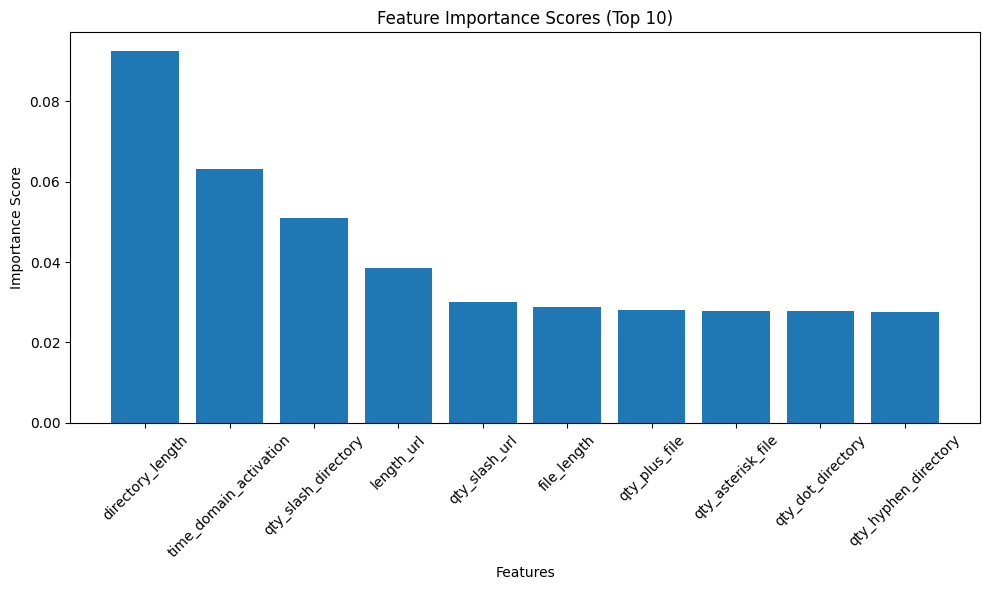


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Evaluation Metrics on Validation Set:
Accuracy: 0.9439932318104907
Precision: 0.9144747458447636
Recall: 0.9244698205546492
F1-Score: 0.9194451204672669

Evaluation Metrics on Test Set:
Accuracy: 0.9427523970671179
Precision: 0.9161920260374288
Recall: 0.9184339314845025
F1-Score: 0.9173116089613035
Prediction Time on Test Set: 0.17039084434509277 seconds


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import time


# Train Random Forest classifier to obtain feature importances
rf_classifier10 = RandomForestClassifier(random_state=42)
rf_classifier10.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = rf_classifier10.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 10
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 10)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
selector = SelectFromModel(rf_classifier10, threshold=-float('inf'), max_features=top_n)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected_rf10 = selector.transform(X_test)

# Define hyperparameters for tuning using the selected features
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier10, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_rf10 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_rf10.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_rf10 = accuracy_score(y_val, y_pred_val)
precision_rf10 = precision_score(y_val, y_pred_val)
recall_rf10 = recall_score(y_val, y_pred_val)
f1_rf10 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_rf10}")
print(f"Precision: {precision_rf10}")
print(f"Recall: {recall_rf10}")
print(f"F1-Score: {f1_rf10}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test10 = best_estimator_rf10.predict(X_test_selected_rf10)
end_time = time.time()
prediction_time_test_rf10 = end_time - start_time


# Evaluate the model on test set
y_pred_test10 = best_estimator_rf10.predict(X_test_selected_rf10)
test_accuracy_rf10 = accuracy_score(y_test, y_pred_test10)
test_precision_rf10 = precision_score(y_test, y_pred_test10)
test_recall_rf10 = recall_score(y_test, y_pred_test10)
test_f1_rf10 = f1_score(y_test, y_pred_test10)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_rf10}")
print(f"Precision: {test_precision_rf10}")
print(f"Recall: {test_recall_rf10}")
print(f"F1-Score: {test_f1_rf10}")
print(f"Prediction Time on Test Set: {prediction_time_test_rf10} seconds")


In [30]:
import art



In [37]:
from art.attacks.evasion import BoundaryAttack
from art.estimators.classification import SklearnClassifier

# Convert scikit-learn random forest classifier to ART classifier
art_classifier = SklearnClassifier(model=best_estimator_rf10)

# Initialize BoundaryAttack for a targeted attack
ba_attack = BoundaryAttack(art_classifier, targeted=True, max_iter=100, epsilon=50)

# Select instances of class 1 (phishing) from the test set
X_phishing = X_test_selected_rf10[y_test == 1]

# Generate adversarial examples for instances of class 1 targeted as class 0 (legitimate)
X_phishing_adv = ba_attack.generate(X_phishing, y=np.zeros(len(X_phishing)))

# Make predictions with the random forest classifier on the adversarial examples
y_pred_test_adv_rf = best_estimator_rf10.predict(X_phishing_adv)

# Evaluate the performance of the random forest classifier on the adversarial examples
test_accuracy_adv_rf = accuracy_score(np.zeros(len(X_phishing)), y_pred_test_adv_rf)
test_precision_adv_rf = precision_score(np.zeros(len(X_phishing)), y_pred_test_adv_rf)
test_recall_adv_rf = recall_score(np.zeros(len(X_phishing)), y_pred_test_adv_rf)
test_f1_adv_rf = f1_score(np.zeros(len(X_phishing)), y_pred_test_adv_rf)

print("Evaluation Metrics on Adversarial Test Set (Random Forest Classifier):")
print(f"Accuracy: {test_accuracy_adv_rf}")
print(f"Precision: {test_precision_adv_rf}")
print(f"Recall: {test_recall_adv_rf}")
print(f"F1-Score: {test_f1_adv_rf}")


Boundary attack:   0%|          | 0/6130 [00:00<?, ?it/s]

Boundary attack: 100%|██████████| 6130/6130 [1:05:12<00:00,  1.57it/s]


Evaluation Metrics on Adversarial Test Set (Random Forest Classifier):
Accuracy: 0.4836867862969005
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
import numpy as np

# Find the indices of instances with dependent feature value 1 in the original test data
indices_class_1_original = np.where(y_test == 1)[0]

# Replace the original instances of class 1 with the corresponding adversarial examples
X_test_combined = X_test_selected_rf10.copy()
X_test_combined[indices_class_1_original] = X_phishing_adv

# Make predictions with the random forest classifier on the combined test data
y_pred_combined_rf = best_estimator_rf10.predict(X_test_combined)

# Compute confusion matrix for the combined test data
cm_combined = confusion_matrix(y_test, y_pred_combined_rf)

# Print confusion matrix for the combined test data
print("Confusion Matrix (Original + Adversarial Test Set):")
print(cm_combined)

# Calculate evaluation metrics for the combined test data
accuracy_combined = accuracy_score(y_test, y_pred_combined_rf)
precision_combined = precision_score(y_test, y_pred_combined_rf)
recall_combined = recall_score(y_test, y_pred_combined_rf)
f1_combined = f1_score(y_test, y_pred_combined_rf)

# Print evaluation metrics for the combined test data
print("Evaluation Metrics on Combined Test Set:")
print(f"Accuracy: {accuracy_combined}")
print(f"Precision: {precision_combined}")
print(f"Recall: {recall_combined}")
print(f"F1-Score: {f1_combined}")


Confusion Matrix (Original + Adversarial Test Set):
[[11085   515]
 [ 2965  3165]]
Evaluation Metrics on Combined Test Set:
Accuracy: 0.8037225042301185
Precision: 0.8600543478260869
Recall: 0.5163132137030995
F1-Score: 0.6452599388379204


In [23]:
if X_train_selected.shape[1] == X_test_selected_rf10.shape[1]:
    print("Number of features in X_train_selected and X_test_selected is the same.")
else:
    print("Number of features in X_train_selected and X_test_selected is different.")



Number of features in X_train_selected and X_test_selected is the same.


Selected Features:
directory_length
time_domain_activation
qty_slash_directory
length_url
qty_slash_url
file_length
qty_plus_file
qty_asterisk_file
qty_dot_directory
qty_hyphen_directory
qty_dot_file
ttl_hostname
asn_ip
time_response
qty_percent_directory


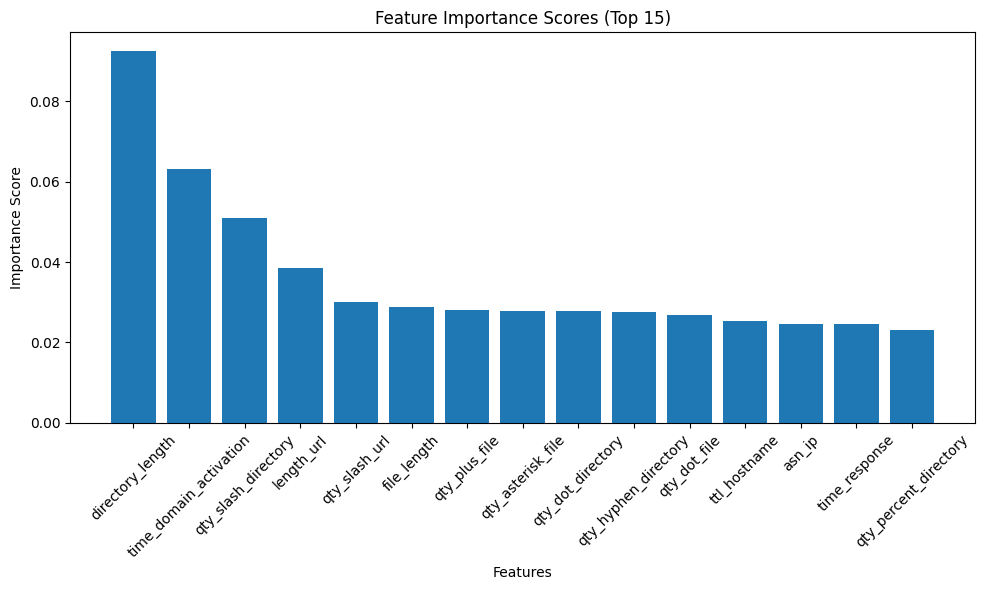


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Evaluation Metrics on Validation Set:
Accuracy: 0.9604624929498026
Precision: 0.9378932085820294
Recall: 0.9484502446982055
F1-Score: 0.9431421850920594

Evaluation Metrics on Test Set:
Accuracy: 0.9630569655950366
Precision: 0.943032853212494
Recall: 0.9505709624796085
F1-Score: 0.9467869038914616
Prediction Time on Test Set: 0.36673593521118164 seconds


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train Random Forest classifier to obtain feature importances
rf_classifier15 = RandomForestClassifier(random_state=42)
rf_classifier15.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = rf_classifier15.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 15 most important features
top_n = 15
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 15)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
selector = SelectFromModel(rf_classifier15, threshold=-float('inf'), max_features=top_n)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected_rf15 = selector.transform(X_test)

# Define hyperparameters for tuning using the selected features
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier15, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_rf15 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_rf15.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_rf15 = accuracy_score(y_val, y_pred_val)
precision_rf15 = precision_score(y_val, y_pred_val)
recall_rf15 = recall_score(y_val, y_pred_val)
f1_rf15 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_rf15}")
print(f"Precision: {precision_rf15}")
print(f"Recall: {recall_rf15}")
print(f"F1-Score: {f1_rf15}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_rf15 = best_estimator_rf15.predict(X_test_selected_rf15)
end_time = time.time()
prediction_time_test_rf15 = end_time - start_time

# Evaluate the model on test set
y_pred_test15 = best_estimator_rf15.predict(X_test_selected_rf15)
test_accuracy_rf15 = accuracy_score(y_test, y_pred_test15)
test_precision_rf15 = precision_score(y_test, y_pred_test15)
test_recall_rf15 = recall_score(y_test, y_pred_test15)
test_f1_rf15 = f1_score(y_test, y_pred_test15)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_rf15}")
print(f"Precision: {test_precision_rf15}")
print(f"Recall: {test_recall_rf15}")
print(f"F1-Score: {test_f1_rf15}")
print(f"Prediction Time on Test Set: {prediction_time_test_rf15} seconds")


In [44]:
from art.attacks.evasion import BoundaryAttack
from art.estimators.classification import SklearnClassifier

# Convert scikit-learn random forest classifier to ART classifier
art_classifier = SklearnClassifier(model=best_estimator_rf15)

# Initialize BoundaryAttack for a targeted attack
ba_attack = BoundaryAttack(art_classifier, targeted=True, max_iter=100, epsilon=50)

# Select instances of class 1 (phishing) from the test set
X_phishing_rf15 = X_test_selected_rf15[y_test == 1]

# Generate adversarial examples for instances of class 1 targeted as class 0 (legitimate)
X_phishing_adv_rf15 = ba_attack.generate(X_phishing_rf15, y=np.zeros(len(X_phishing_rf15)))

# Make predictions with the random forest classifier on the adversarial examples
y_pred_test_adv_rf15 = best_estimator_rf15.predict(X_phishing_adv_rf15)

# Evaluate the performance of the random forest classifier on the adversarial examples
test_accuracy_adv_rf15 = accuracy_score(np.zeros(len(X_phishing_rf15)), y_pred_test_adv_rf15)
test_precision_adv_rf15 = precision_score(np.zeros(len(X_phishing_rf15)), y_pred_test_adv_rf15)
test_recall_adv_rf15 = recall_score(np.zeros(len(X_phishing_rf15)), y_pred_test_adv_rf15)
test_f1_adv_rf15 = f1_score(np.zeros(len(X_phishing_rf15)), y_pred_test_adv_rf15)



Boundary attack:  29%|██▉       | 1798/6130 [26:12<55:48,  1.29it/s]  

In [ ]:
# Find the indices of instances with dependent feature value 1 in the original test data
indices_class_1_original = np.where(y_test == 1)[0]

# Replace the original instances of class 1 with the corresponding adversarial examples
X_test_combined_rf15 = X_test_selected_rf15.copy()
X_test_combined_rf15[indices_class_1_original] = X_phishing_adv_rf15

# Make predictions with the random forest classifier on the combined test data
y_pred_combined_rf15 = best_estimator_rf15.predict(X_test_combined_rf15)

# Compute confusion matrix for the combined test data
cm_combined_rf15 = confusion_matrix(y_test, y_pred_combined_rf15)

# Print confusion matrix for the combined test data
print("Confusion Matrix (Original + Adversarial Test Set):")
print(cm_combined_rf15)

# Calculate evaluation metrics for the combined test data
accuracy_combined_rf15 = accuracy_score(y_test, y_pred_combined_rf15)
precision_combined_rf15 = precision_score(y_test, y_pred_combined_rf15)
recall_combined_rf15 = recall_score(y_test, y_pred_combined_rf15)
f1_combined_rf15 = f1_score(y_test, y_pred_combined_rf15)

# Print evaluation metrics for the combined test data
print("Evaluation Metrics on Combined Test Set:")
print(f"Accuracy: {accuracy_combined_rf15}")
print(f"Precision: {precision_combined_rf15}")
print(f"Recall: {recall_combined_rf15}")
print(f"F1-Score: {f1_combined_rf15}")


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_adv_rf15)

# Print confusion matrix
print("Confusion Matrix (PGD Attack):")
print(cm)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import time

# Train Random Forest classifier to obtain feature importances
rf_classifier20 = RandomForestClassifier(random_state=42)
rf_classifier20.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = rf_classifier20.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 15 most important features
top_n = 20
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 20)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
selector = SelectFromModel(rf_classifier20, threshold=-float('inf'), max_features=top_n)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected_rf20 = selector.transform(X_test)

# Define hyperparameters for tuning using the selected features
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 3, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier20, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_rf20 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set and measure time
start_time = time.time()
y_pred_val = best_estimator_rf20.predict(X_val_selected)
end_time = time.time()
prediction_time_val = end_time - start_time

# Evaluate the model on validation set
accuracy_rf20 = accuracy_score(y_val, y_pred_val)
precision_rf20 = precision_score(y_val, y_pred_val)
recall_rf20 = recall_score(y_val, y_pred_val)
f1_rf20 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_rf20}")
print(f"Precision: {precision_rf20}")
print(f"Recall: {recall_rf20}")
print(f"F1-Score: {f1_rf20}")
print(f"Prediction Time on Validation Set: {prediction_time_val} seconds")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_rf20 = best_estimator_rf20.predict(X_test_selected_rf20)
end_time = time.time()
prediction_time_test = end_time - start_time

# Evaluate the model on test set
test_accuracy_rf20 = accuracy_score(y_test, y_pred_test_rf20)
test_precision_rf20 = precision_score(y_test, y_pred_test_rf20)
test_recall_rf20 = recall_score(y_test, y_pred_test_rf20)
test_f1_rf20 = f1_score(y_test, y_pred_test_rf20)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_rf20}")
print(f"Precision: {test_precision_rf20}")
print(f"Recall: {test_recall_rf20}")
print(f"F1-Score: {test_f1_rf20}")
print(f"Prediction Time on Test Set: {prediction_time_test} seconds")


In [ ]:
from art.attacks.evasion import BoundaryAttack
from art.estimators.classification import SklearnClassifier

# Convert scikit-learn random forest classifier to ART classifier
art_classifier = SklearnClassifier(model=best_estimator_rf20)

# Initialize BoundaryAttack for a targeted attack
ba_attack = BoundaryAttack(art_classifier, targeted=True, max_iter=100, epsilon=50)

# Select instances of class 1 (phishing) from the test set
X_phishing_rf20 = X_test_selected_rf20[y_test == 1]

# Generate adversarial examples for instances of class 1 targeted as class 0 (legitimate)
X_phishing_adv_rf20 = ba_attack.generate(X_phishing_rf20, y=np.zeros(len(X_phishing_rf20)))

# Make predictions with the random forest classifier on the adversarial examples
y_pred_test_adv_rf20 = best_estimator_rf20.predict(X_phishing_adv_rf20)

# Evaluate the performance of the random forest classifier on the adversarial examples
test_accuracy_adv_rf20 = accuracy_score(np.zeros(len(X_phishing_rf20)), y_pred_test_adv_rf20)
test_precision_adv_rf20 = precision_score(np.zeros(len(X_phishing_rf20)), y_pred_test_adv_rf20)
test_recall_adv_rf20 = recall_score(np.zeros(len(X_phishing_rf20)), y_pred_test_adv_rf20)
test_f1_adv_rf20 = f1_score(np.zeros(len(X_phishing_rf20)), y_pred_test_adv_rf20)



In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_adv_rf20)

# Print confusion matrix
print("Confusion Matrix (PGD Attack):")
print(cm)



In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train XGBoost classifier
xgb_classifier10 = XGBClassifier(random_state=42)
xgb_classifier10.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = xgb_classifier10.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 10
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 10)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected_xgb10 = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees
    'max_depth': [7, 9, 11, 13, 15],  # Maximum depth of trees
    'learning_rate': [0.2, 0.1, 0.01, 0.001]  # Learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_classifier10, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_xgb10 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_xgb10.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_xgb10 = accuracy_score(y_val, y_pred_val)
precision_xgb10 = precision_score(y_val, y_pred_val)
recall_xgb10 = recall_score(y_val, y_pred_val)
f1_xgb10 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_xgb10}")
print(f"Precision: {precision_xgb10}")
print(f"Recall: {recall_xgb10}")
print(f"F1-Score: {f1_xgb10}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_xgb10 = best_estimator_xgb10.predict(X_test_selected_xgb10)
end_time = time.time()
prediction_time_test_xgb10 = end_time - start_time


# Evaluate the model on test set
y_pred_test_xgb10 = best_estimator_xgb10.predict(X_test_selected_xgb10)
test_accuracy_xgb10 = accuracy_score(y_test, y_pred_test_xgb10)
test_precision_xgb10 = precision_score(y_test, y_pred_test_xgb10)
test_recall_xgb10 = recall_score(y_test, y_pred_test_xgb10)
test_f1_xgb10 = f1_score(y_test, y_pred_test_xgb10)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_xgb10}")
print(f"Precision: {test_precision_xgb10}")
print(f"Recall: {test_recall_xgb10}")
print(f"F1-Score: {test_f1_xgb10}")
print(f"Prediction Time on Test Set: {prediction_time_test_xgb10} seconds")


In [ ]:
# Define initial hyperparameters
initial_epsilon = 1
initial_alpha = 1
initial_num_iter = 1000

# Define convergence criterion
convergence_threshold = 0.000001

# Initialize variables to store the best hyperparameters and the corresponding false negatives
best_hyperparameters = None
best_false_negatives = 0

# Start with initial hyperparameters
epsilon = initial_epsilon
alpha = initial_alpha
num_iter = initial_num_iter

# Track the number of iterations since the last decrease in false negatives
iterations_since_last_decrease = 0

# Perform iterative optimization
while True:
    # Generate adversarial examples using PGD with current hyperparameters
    X_test_adv_xgb10 = pgd_attack(best_estimator_xgb10, X_test_selected_xgb10, y_test, epsilon=epsilon, alpha=alpha, num_iter=num_iter)

    # Evaluate the model on the adversarial examples
    y_pred_adv_xgb10 = best_estimator_xgb10.predict(X_test_adv_xgb10)
    false_negatives_xgb10 = np.sum((y_pred_adv_xgb10 == 0) & (y_test == 1))

    # Update the best hyperparameters if the current combination achieves more false negatives
    if false_negatives_xgb10 > best_false_negatives:
        best_false_negatives = false_negatives_xgb10
        best_hyperparameters = {'epsilon': epsilon, 'alpha': alpha, 'num_iter': num_iter}
        iterations_since_last_decrease = 0
    else:
        iterations_since_last_decrease += 1

    # Adjust hyperparameters based on the loss function (adaptive strategy)
    # Here, you can experiment with different adaptive strategies based on your loss function
    # For simplicity, let's just increase epsilon by 1 in each loop
    epsilon += 1

    # Check convergence
    if iterations_since_last_decrease >= 50:
        break

# Generate adversarial examples using PGD with the best hyperparameters
X_test_adv_xgb10 = pgd_attack(best_estimator_xgb10, X_test_selected_xgb10, y_test, **best_hyperparameters)

# Evaluate the model on the adversarial examples
y_pred_adv_xgb10 = best_estimator_xgb10.predict(X_test_adv_xgb10)
adv_accuracy_xgb10 = accuracy_score(y_test, y_pred_adv_xgb10)
adv_precision_xgb10 = precision_score(y_test, y_pred_adv_xgb10)
adv_recall_xgb10 = recall_score(y_test, y_pred_adv_xgb10)
adv_f1_xgb10 = f1_score(y_test, y_pred_adv_xgb10)

print("Best Hyperparameters:")
print(best_hyperparameters)
print("Evaluation Metrics on Adversarial Test Set (PGD):")
print(f"Accuracy: {adv_accuracy_xgb10}")
print(f"Precision: {adv_precision_xgb10}")
print(f"Recall: {adv_recall_xgb10}")
print(f"F1-Score: {adv_f1_xgb10}")


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_adv_xgb10)

# Print confusion matrix
print("Confusion Matrix (PGD Attack):")
print(cm)



In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train XGBoost classifier
xgb_classifier15 = XGBClassifier(random_state=42)
xgb_classifier15.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = xgb_classifier15.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 15
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 15)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected_xgb15 = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees
    'max_depth': [9, 11, 13, 15],  # Maximum depth of trees
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_classifier15, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_xgb15 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_xgb15.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_xgb15 = accuracy_score(y_val, y_pred_val)
precision_xgb15 = precision_score(y_val, y_pred_val)
recall_xgb15 = recall_score(y_val, y_pred_val)
f1_xgb15 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_xgb15}")
print(f"Precision: {precision_xgb15}")
print(f"Recall: {recall_xgb15}")
print(f"F1-Score: {f1_xgb15}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_xgb15 = best_estimator_xgb15.predict(X_test_selected_xgb15)
end_time = time.time()
prediction_time_test_xgb15 = end_time - start_time

# Evaluate the model on test set
y_pred_test_xgb15 = best_estimator_xgb15.predict(X_test_selected_xgb15)
test_accuracy_xgb15 = accuracy_score(y_test, y_pred_test_xgb15)
test_precision_xgb15 = precision_score(y_test, y_pred_test_xgb15)
test_recall_xgb15 = recall_score(y_test, y_pred_test_xgb15)
test_f1_xgb15 = f1_score(y_test, y_pred_test_xgb15)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_xgb15}")
print(f"Precision: {test_precision_xgb15}")
print(f"Recall: {test_recall_xgb15}")
print(f"F1-Score: {test_f1_xgb15}")
print(f"Prediction Time on Test Set: {prediction_time_test_xgb15} seconds")


In [ ]:
# Define initial hyperparameters
initial_epsilon = 20
initial_alpha = 1
initial_num_iter = 1000

# Define convergence criterion
convergence_threshold = 0.000001

# Initialize variables to store the best hyperparameters and the corresponding false negatives
best_hyperparameters = None
best_false_negatives = 0

# Start with initial hyperparameters
epsilon = initial_epsilon
alpha = initial_alpha
num_iter = initial_num_iter

# Track the number of iterations since the last decrease in false negatives
iterations_since_last_decrease = 0

# Perform iterative optimization
while True:
    # Generate adversarial examples using PGD with current hyperparameters
    X_test_adv_xgb15 = pgd_attack(best_estimator_xgb15, X_test_selected_xgb15, y_test, epsilon=epsilon, alpha=alpha, num_iter=num_iter)

    # Evaluate the model on the adversarial examples
    y_pred_adv_xgb15 = best_estimator_xgb15.predict(X_test_adv_xgb15)
    false_negatives_xgb15 = np.sum((y_pred_adv_xgb15 == 0) & (y_test == 1))

    # Update the best hyperparameters if the current combination achieves more false negatives
    if false_negatives_xgb15 > best_false_negatives:
        best_false_negatives = false_negatives_xgb15
        best_hyperparameters = {'epsilon': epsilon, 'alpha': alpha, 'num_iter': num_iter}
        iterations_since_last_decrease = 0
    else:
        iterations_since_last_decrease += 1

    # Adjust hyperparameters based on the loss function (adaptive strategy)
    # Here, you can experiment with different adaptive strategies based on your loss function
    # For simplicity, let's just increase epsilon by 1 in each loop
    epsilon += 1

    # Check convergence
    if iterations_since_last_decrease >= 50:
        break

# Generate adversarial examples using PGD with the best hyperparameters
X_test_adv_xgb15 = pgd_attack(best_estimator_xgb15, X_test_selected_xgb15, y_test, **best_hyperparameters)

# Evaluate the model on the adversarial examples
y_pred_adv_xgb15 = best_estimator_xgb15.predict(X_test_adv_xgb15)
adv_accuracy_xgb15 = accuracy_score(y_test, y_pred_adv_xgb15)
adv_precision_xgb15 = precision_score(y_test, y_pred_adv_xgb15)
adv_recall_xgb15 = recall_score(y_test, y_pred_adv_xgb15)
adv_f1_xgb15 = f1_score(y_test, y_pred_adv_xgb15)

print("Best Hyperparameters:")
print(best_hyperparameters)
print("Evaluation Metrics on Adversarial Test Set (PGD):")
print(f"Accuracy: {adv_accuracy_xgb15}")
print(f"Precision: {adv_precision_xgb15}")
print(f"Recall: {adv_recall_xgb15}")
print(f"F1-Score: {adv_f1_xgb15}")


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_adv_xgb15)

# Print confusion matrix
print("Confusion Matrix (PGD Attack):")
print(cm)



In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train XGBoost classifier
xgb_classifier20 = XGBClassifier(random_state=42)
xgb_classifier20.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = xgb_classifier20.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 20
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 20)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected_xgb20 = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees
    'max_depth': [9, 11, 13, 15],  # Maximum depth of trees
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_classifier20, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_xgb20 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_xgb20.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_xgb20 = accuracy_score(y_val, y_pred_val)
precision_xgb20 = precision_score(y_val, y_pred_val)
recall_xgb20 = recall_score(y_val, y_pred_val)
f1_xgb20 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_xgb20}")
print(f"Precision: {precision_xgb20}")
print(f"Recall: {recall_xgb20}")
print(f"F1-Score: {f1_xgb20}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_xgb20 = best_estimator_xgb20.predict(X_test_selected_xgb20)
end_time = time.time()
prediction_time_test_xgb20 = end_time - start_time

# Evaluate the model on test set
y_pred_test_xgb20 = best_estimator_xgb20.predict(X_test_selected_xgb20)
test_accuracy_xgb20 = accuracy_score(y_test, y_pred_test_xgb20)
test_precision_xgb20 = precision_score(y_test, y_pred_test_xgb20)
test_recall_xgb20 = recall_score(y_test, y_pred_test_xgb20)
test_f1_xgb20 = f1_score(y_test, y_pred_test_xgb20)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_xgb20}")
print(f"Precision: {test_precision_xgb20}")
print(f"Recall: {test_recall_xgb20}")
print(f"F1-Score: {test_f1_xgb20}")
print(f"Prediction Time on Test Set: {prediction_time_test_xgb20} seconds")


In [ ]:
# Define initial hyperparameters
initial_epsilon = 1
initial_alpha = 1
initial_num_iter = 1000

# Define convergence criterion
convergence_threshold = 0.000001

# Initialize variables to store the best hyperparameters and the corresponding false negatives
best_hyperparameters = None
best_false_negatives = 0

# Start with initial hyperparameters
epsilon = initial_epsilon
alpha = initial_alpha
num_iter = initial_num_iter

# Track the number of iterations since the last decrease in false negatives
iterations_since_last_decrease = 0

# Perform iterative optimization
while True:
    # Generate adversarial examples using PGD with current hyperparameters
    X_test_adv_xgb20 = pgd_attack(best_estimator_xgb20, X_test_selected_xgb20, y_test, epsilon=epsilon, alpha=alpha, num_iter=num_iter)

    # Evaluate the model on the adversarial examples
    y_pred_adv_xgb20 = best_estimator_xgb20.predict(X_test_adv_xgb20)
    false_negatives_xgb20 = np.sum((y_pred_adv_xgb20 == 0) & (y_test == 1))

    # Update the best hyperparameters if the current combination achieves more false negatives
    if false_negatives_xgb20 > best_false_negatives:
        best_false_negatives = false_negatives_xgb20
        best_hyperparameters = {'epsilon': epsilon, 'alpha': alpha, 'num_iter': num_iter}
        iterations_since_last_decrease = 0
    else:
        iterations_since_last_decrease += 1

    # Adjust hyperparameters based on the loss function (adaptive strategy)
    # Here, you can experiment with different adaptive strategies based on your loss function
    # For simplicity, let's just increase epsilon by 1 in each loop
    epsilon += 1

    # Check convergence
    if iterations_since_last_decrease >= 50:
        break

# Generate adversarial examples using PGD with the best hyperparameters
X_test_adv_xgb20 = pgd_attack(best_estimator_xgb20, X_test_selected_xgb20, y_test, **best_hyperparameters)

# Evaluate the model on the adversarial examples
y_pred_adv_xgb20 = best_estimator_xgb20.predict(X_test_adv_xgb20)
adv_accuracy_xgb20 = accuracy_score(y_test, y_pred_adv_xgb20)
adv_precision_xgb20 = precision_score(y_test, y_pred_adv_xgb20)
adv_recall_xgb20 = recall_score(y_test, y_pred_adv_xgb20)
adv_f1_xgb20 = f1_score(y_test, y_pred_adv_xgb20)

print("Best Hyperparameters:")
print(best_hyperparameters)
print("Evaluation Metrics on Adversarial Test Set (PGD):")
print(f"Accuracy: {adv_accuracy_xgb20}")
print(f"Precision: {adv_precision_xgb20}")
print(f"Recall: {adv_recall_xgb20}")
print(f"F1-Score: {adv_f1_xgb20}")


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_adv_xgb20)

# Print confusion matrix
print("Confusion Matrix (PGD Attack):")
print(cm)



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train AdaBoost classifier
ada_classifier10 = AdaBoostClassifier(random_state=42)
ada_classifier10.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = ada_classifier10.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 10
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 10)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected_ada10 = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ada_classifier10, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_ada10 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_ada10.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_ada10 = accuracy_score(y_val, y_pred_val)
precision_ada10 = precision_score(y_val, y_pred_val)
recall_ada10 = recall_score(y_val, y_pred_val)
f1_ada10 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_ada10}")
print(f"Precision: {precision_ada10}")
print(f"Recall: {recall_ada10}")
print(f"F1-Score: {f1_ada10}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_ada10 = best_estimator_ada10.predict(X_test_selected_ada10)
end_time = time.time()
prediction_time_test_ada10 = end_time - start_time

# Evaluate the model on test set
y_pred_test10 = best_estimator_ada10.predict(X_test_selected_ada10)
test_accuracy_ada10 = accuracy_score(y_test, y_pred_test10)
test_precision_ada10 = precision_score(y_test, y_pred_test10)
test_recall_ada10 = recall_score(y_test, y_pred_test10)
test_f1_ada10 = f1_score(y_test, y_pred_test10)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_ada10}")
print(f"Precision: {test_precision_ada10}")
print(f"Recall: {test_recall_ada10}")
print(f"F1-Score: {test_f1_ada10}")
print(f"Prediction Time on Test Set: {prediction_time_test_ada10} seconds")


In [ ]:
# Define initial hyperparameters
initial_epsilon = 1
initial_alpha = 1
initial_num_iter = 1000

# Define convergence criterion
convergence_threshold = 0.000001

# Initialize variables to store the best hyperparameters and the corresponding false negatives
best_hyperparameters = None
best_false_negatives = 0

# Start with initial hyperparameters
epsilon = initial_epsilon
alpha = initial_alpha
num_iter = initial_num_iter

# Track the number of iterations since the last decrease in false negatives
iterations_since_last_decrease = 0

# Perform iterative optimization
while True:
    # Generate adversarial examples using PGD with current hyperparameters
    X_test_adv_ada10 = pgd_attack(best_estimator_ada10, X_test_selected_ada10, y_test, epsilon=epsilon, alpha=alpha, num_iter=num_iter)

    # Evaluate the model on the adversarial examples
    y_pred_adv_ada10 = best_estimator_ada10.predict(X_test_adv_ada10)
    false_negatives_ada10 = np.sum((y_pred_adv_ada10 == 0) & (y_test == 1))

    # Update the best hyperparameters if the current combination achieves more false negatives
    if false_negatives_ada10 > best_false_negatives:
        best_false_negatives = false_negatives_ada10
        best_hyperparameters = {'epsilon': epsilon, 'alpha': alpha, 'num_iter': num_iter}
        iterations_since_last_decrease = 0
    else:
        iterations_since_last_decrease += 1

    # Adjust hyperparameters based on the loss function (adaptive strategy)
    # Here, you can experiment with different adaptive strategies based on your loss function
    # For simplicity, let's just increase epsilon by 1 in each loop
    epsilon += 1

    # Check convergence
    if iterations_since_last_decrease >= 50:
        break

# Generate adversarial examples using PGD with the best hyperparameters
X_test_adv_ada10 = pgd_attack(best_estimator_ada10, X_test_selected_ada10, y_test, **best_hyperparameters)

# Evaluate the model on the adversarial examples
y_pred_adv_ada10 = best_estimator_ada10.predict(X_test_adv_ada10)
adv_accuracy_ada10 = accuracy_score(y_test, y_pred_adv_ada10)
adv_precision_ada10 = precision_score(y_test, y_pred_adv_ada10)
adv_recall_ada10 = recall_score(y_test, y_pred_adv_ada10)
adv_f1_ada10 = f1_score(y_test, y_pred_adv_ada10)

print("Best Hyperparameters:")
print(best_hyperparameters)
print("Evaluation Metrics on Adversarial Test Set (PGD):")
print(f"Accuracy: {adv_accuracy_ada10}")
print(f"Precision: {adv_precision_ada10}")
print(f"Recall: {adv_recall_ada10}")
print(f"F1-Score: {adv_f1_ada10}")


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train AdaBoost classifier
ada_classifier15 = AdaBoostClassifier(random_state=42)
ada_classifier15.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = ada_classifier15.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 15
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 15)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected_ada15 = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ada_classifier15, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_ada15 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_ada15.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_ada15 = accuracy_score(y_val, y_pred_val)
precision_ada15 = precision_score(y_val, y_pred_val)
recall_ada15 = recall_score(y_val, y_pred_val)
f1_ada15 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_ada15}")
print(f"Precision: {precision_ada15}")
print(f"Recall: {recall_ada15}")
print(f"F1-Score: {f1_ada15}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_ada15 = best_estimator_ada15.predict(X_test_selected_ada15)
end_time = time.time()
prediction_time_test_ada15 = end_time - start_time

# Evaluate the model on test set
y_pred_test15 = best_estimator_ada15.predict(X_test_selected_ada15)
test_accuracy_ada15 = accuracy_score(y_test, y_pred_test15)
test_precision_ada15 = precision_score(y_test, y_pred_test15)
test_recall_ada15 = recall_score(y_test, y_pred_test15)
test_f1_ada15 = f1_score(y_test, y_pred_test15)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_ada15}")
print(f"Precision: {test_precision_ada15}")
print(f"Recall: {test_recall_ada15}")
print(f"F1-Score: {test_f1_ada15}")
print(f"Prediction Time on Test Set: {prediction_time_test_ada15} seconds")

In [ ]:
# Define initial hyperparameters
initial_epsilon = 1
initial_alpha = 1
initial_num_iter = 1000

# Define convergence criterion
convergence_threshold = 0.000001

# Initialize variables to store the best hyperparameters and the corresponding false negatives
best_hyperparameters = None
best_false_negatives = 0

# Start with initial hyperparameters
epsilon = initial_epsilon
alpha = initial_alpha
num_iter = initial_num_iter

# Track the number of iterations since the last decrease in false negatives
iterations_since_last_decrease = 0

# Perform iterative optimization
while True:
    # Generate adversarial examples using PGD with current hyperparameters
    X_test_adv_ada15 = pgd_attack(best_estimator_ada15, X_test_selected_ada15, y_test, epsilon=epsilon, alpha=alpha, num_iter=num_iter)

    # Evaluate the model on the adversarial examples
    y_pred_adv_ada15 = best_estimator_ada15.predict(X_test_adv_ada15)
    false_negatives_ada15 = np.sum((y_pred_adv_ada15 == 0) & (y_test == 1))

    # Update the best hyperparameters if the current combination achieves more false negatives
    if false_negatives_ada15 > best_false_negatives:
        best_false_negatives = false_negatives_ada15
        best_hyperparameters = {'epsilon': epsilon, 'alpha': alpha, 'num_iter': num_iter}
        iterations_since_last_decrease = 0
    else:
        iterations_since_last_decrease += 1

    # Adjust hyperparameters based on the loss function (adaptive strategy)
    # Here, you can experiment with different adaptive strategies based on your loss function
    # For simplicity, let's just increase epsilon by 1 in each loop
    epsilon += 1

    # Check convergence
    if iterations_since_last_decrease >= 50:
        break

# Generate adversarial examples using PGD with the best hyperparameters
X_test_adv_ada15 = pgd_attack(best_estimator_ada15, X_test_selected_ada15, y_test, **best_hyperparameters)

# Evaluate the model on the adversarial examples
y_pred_adv_ada15 = best_estimator_ada15.predict(X_test_adv_ada15)
adv_accuracy_ada15 = accuracy_score(y_test, y_pred_adv_ada15)
adv_precision_ada15 = precision_score(y_test, y_pred_adv_ada15)
adv_recall_ada15 = recall_score(y_test, y_pred_adv_ada15)
adv_f1_ada15 = f1_score(y_test, y_pred_adv_ada15)

print("Best Hyperparameters:")
print(best_hyperparameters)
print("Evaluation Metrics on Adversarial Test Set (PGD):")
print(f"Accuracy: {adv_accuracy_ada15}")
print(f"Precision: {adv_precision_ada15}")
print(f"Recall: {adv_recall_ada15}")
print(f"F1-Score: {adv_f1_ada15}")


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Train AdaBoost classifier
ada_classifier20 = AdaBoostClassifier(random_state=42)
ada_classifier20.fit(X_train, y_train)

# Extract feature importances and sort them
feature_importances = ada_classifier20.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 most important features
top_n = 20
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 20)')
plt.tight_layout()
plt.show()

# Use the selected features for hyperparameter tuning using GridSearchCV
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]
X_test_selected_ada20 = X_test.iloc[:, selected_features]

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ada_classifier20, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_ada20 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_ada20.predict(X_val_selected)

# Evaluate the model on validation set
accuracy_ada20 = accuracy_score(y_val, y_pred_val)
precision_ada20 = precision_score(y_val, y_pred_val)
recall_ada20 = recall_score(y_val, y_pred_val)
f1_ada20 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_ada20}")
print(f"Precision: {precision_ada20}")
print(f"Recall: {recall_ada20}")
print(f"F1-Score: {f1_ada20}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_ada20 = best_estimator_ada20.predict(X_test_selected_ada20)
end_time = time.time()
prediction_time_test_ada20 = end_time - start_time

# Evaluate the model on test set
y_pred_test20 = best_estimator_ada20.predict(X_test_selected_ada20)
test_accuracy_ada20 = accuracy_score(y_test, y_pred_test20)
test_precision_ada20 = precision_score(y_test, y_pred_test20)
test_recall_ada20 = recall_score(y_test, y_pred_test20)
test_f1_ada20 = f1_score(y_test, y_pred_test20)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_ada20}")
print(f"Precision: {test_precision_ada20}")
print(f"Recall: {test_recall_ada20}")
print(f"F1-Score: {test_f1_ada20}")
print(f"Prediction Time on Test Set: {prediction_time_test_ada20} seconds")


In [ ]:
# Define initial hyperparameters
initial_epsilon = 1
initial_alpha = 1
initial_num_iter = 1000

# Define convergence criterion
convergence_threshold = 0.000001

# Initialize variables to store the best hyperparameters and the corresponding false negatives
best_hyperparameters = None
best_false_negatives = 0

# Start with initial hyperparameters
epsilon = initial_epsilon
alpha = initial_alpha
num_iter = initial_num_iter

# Track the number of iterations since the last decrease in false negatives
iterations_since_last_decrease = 0

# Perform iterative optimization
while True:
    # Generate adversarial examples using PGD with current hyperparameters
    X_test_adv_ada20 = pgd_attack(best_estimator_ada20, X_test_selected_ada20, y_test, epsilon=epsilon, alpha=alpha, num_iter=num_iter)

    # Evaluate the model on the adversarial examples
    y_pred_adv_ada20 = best_estimator_ada20.predict(X_test_adv_ada20)
    false_negatives_ada20 = np.sum((y_pred_adv_ada20 == 0) & (y_test == 1))

    # Update the best hyperparameters if the current combination achieves more false negatives
    if false_negatives_ada20 > best_false_negatives:
        best_false_negatives = false_negatives_ada20
        best_hyperparameters = {'epsilon': epsilon, 'alpha': alpha, 'num_iter': num_iter}
        iterations_since_last_decrease = 0
    else:
        iterations_since_last_decrease += 1

    # Adjust hyperparameters based on the loss function (adaptive strategy)
    # Here, you can experiment with different adaptive strategies based on your loss function
    # For simplicity, let's just increase epsilon by 1 in each loop
    epsilon += 1

    # Check convergence
    if iterations_since_last_decrease >= 50:
        break

# Generate adversarial examples using PGD with the best hyperparameters
X_test_adv_ada20 = pgd_attack(best_estimator_ada20, X_test_selected_ada20, y_test, **best_hyperparameters)

# Evaluate the model on the adversarial examples
y_pred_adv_ada20 = best_estimator_ada20.predict(X_test_adv_ada20)
adv_accuracy_ada20 = accuracy_score(y_test, y_pred_adv_ada20)
adv_precision_ada20 = precision_score(y_test, y_pred_adv_ada20)
adv_recall_ada20 = recall_score(y_test, y_pred_adv_ada20)
adv_f1_ada20 = f1_score(y_test, y_pred_adv_ada20)

print("Best Hyperparameters:")
print(best_hyperparameters)
print("Evaluation Metrics on Adversarial Test Set (PGD):")
print(f"Accuracy: {adv_accuracy_ada20}")
print(f"Precision: {adv_precision_ada20}")
print(f"Recall: {adv_recall_ada20}")
print(f"F1-Score: {adv_f1_ada20}")


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Initialize MLP classifier
mlp_classifier10 = MLPClassifier(random_state=42, solver='adam', max_iter=1000)

# Train MLP classifier
mlp_classifier10.fit(X_train, y_train)

# Extract feature importances and sort them
# Here, we'll use the magnitudes of the weights in the first hidden layer as feature importance
# You may need to adjust this based on your MLP architecture
weights = mlp_classifier10.coefs_[0]
feature_importances = np.abs(weights).sum(axis=1)
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 15 most important features
top_n = 10
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 10)')
plt.tight_layout()
plt.show()

# Convert array of indices to list of column labels
selected_feature_labels = X_train.columns[selected_features].tolist()

# Use the selected features for training the MLP model
X_train_selected = X_train[selected_feature_labels]
X_val_selected = X_val[selected_feature_labels]
X_test_selected_mlp10 = X_test[selected_feature_labels]

# Define hyperparameters for tuning using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 100)],  # Sizes of hidden layers
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate_init': [0.001, 0.01, 0.1]  # Initial learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp_classifier10, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_mlp10 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_mlp10.predict(X_val_selected)

# Evaluate the model on the validation set
accuracy_mlp10 = accuracy_score(y_val, y_pred_val)
precision_mlp10 = precision_score(y_val, y_pred_val)
recall_mlp10 = recall_score(y_val, y_pred_val)
f1_mlp10 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_mlp10}")
print(f"Precision: {precision_mlp10}")
print(f"Recall: {recall_mlp10}")
print(f"F1-Score: {f1_mlp10}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_mlp10 = best_estimator_mlp10.predict(X_test_selected_mlp10)
end_time = time.time()
prediction_time_test_mlp10 = end_time - start_time

# Evaluate the model on the test set
y_pred_test_mlp10 = best_estimator_mlp10.predict(X_test_selected_mlp10)
test_accuracy_mlp10 = accuracy_score(y_test, y_pred_test_mlp10)
test_precision_mlp10 = precision_score(y_test, y_pred_test_mlp10)
test_recall_mlp10 = recall_score(y_test, y_pred_test_mlp10)
test_f1_mlp10 = f1_score(y_test, y_pred_test_mlp10)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_mlp10}")
print(f"Precision: {test_precision_mlp10}")
print(f"Recall: {test_recall_mlp10}")
print(f"F1-Score: {test_f1_mlp10}")
print(f"Prediction Time on Test Set: {prediction_time_test_mlp10} seconds")


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Initialize MLP classifier
mlp_classifier15 = MLPClassifier(random_state=42, solver='adam', max_iter=1000)

# Train MLP classifier
mlp_classifier15.fit(X_train, y_train)

# Extract feature importances and sort them
# Here, we'll use the magnitudes of the weights in the first hidden layer as feature importance
# You may need to adjust this based on your MLP architecture
weights = mlp_classifier15.coefs_[0]
feature_importances = np.abs(weights).sum(axis=1)
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 15 most important features
top_n = 15
selected_features = sorted_indices[:top_n]

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns

# Print the selected features
print("Selected Features:")
for idx in selected_features:
    print(feature_names[idx])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), feature_importances[selected_features], align='center')
plt.xticks(range(len(selected_features)), [feature_names[idx] for idx in selected_features], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Top 15)')
plt.tight_layout()
plt.show()

# Convert array of indices to list of column labels
selected_feature_labels = X_train.columns[selected_features].tolist()

# Use the selected features for training the MLP model
X_train_selected = X_train[selected_feature_labels]
X_val_selected = X_val[selected_feature_labels]
X_test_selected_mlp15 = X_test[selected_feature_labels]

# Define hyperparameters for tuning using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 100)],  # Sizes of hidden layers
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate_init': [0.001, 0.01, 0.1]  # Initial learning rate
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp_classifier15, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the selected training data
grid_search.fit(X_train_selected, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_mlp15 = grid_search.best_estimator_

# Print the best hyperparameter values chosen during the grid search
print("\nBest Hyperparameters:")
print(best_params)

# Make predictions on the validation set
y_pred_val = best_estimator_mlp15.predict(X_val_selected)

# Evaluate the model on the validation set
accuracy_mlp15 = accuracy_score(y_val, y_pred_val)
precision_mlp15 = precision_score(y_val, y_pred_val)
recall_mlp15 = recall_score(y_val, y_pred_val)
f1_mlp15 = f1_score(y_val, y_pred_val)

print("\nEvaluation Metrics on Validation Set:")
print(f"Accuracy: {accuracy_mlp15}")
print(f"Precision: {precision_mlp15}")
print(f"Recall: {recall_mlp15}")
print(f"F1-Score: {f1_mlp15}")

# Make predictions on test set and measure time
start_time = time.time()
y_pred_test_mlp15 = best_estimator_mlp15.predict(X_test_selected_mlp15)
end_time = time.time()
prediction_time_test_mlp15 = end_time - start_time

# Evaluate the model on the test set
y_pred_test_mlp15 = best_estimator_mlp15.predict(X_test_selected_mlp15)
test_accuracy_mlp15 = accuracy_score(y_test, y_pred_test_mlp15)
test_precision_mlp15 = precision_score(y_test, y_pred_test_mlp15)
test_recall_mlp15 = recall_score(y_test, y_pred_test_mlp15)
test_f1_mlp15 = f1_score(y_test, y_pred_test_mlp15)

print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy: {test_accuracy_mlp15}")
print(f"Precision: {test_precision_mlp15}")
print(f"Recall: {test_recall_mlp15}")
print(f"F1-Score: {test_f1_mlp15}")
print(f"Prediction Time on Test Set: {prediction_time_test_mlp15} seconds")
